###[alt text](/home/yt/datascience/The-circumplex.ppm.png "circumplex")

## Valence-Arousal Prediction Audio and Visual Features

The Mediaeval 2017 Emotional Impact of Movies Task includes the data in the emotional domain 
(valence - arousal  regression) and  fear ( binary classification).
We have displayed the valence and arousal of all the movies in the dataset.
Also the time of the movie where fear is present is specified with the value of the second.
According to the Russell's circumplex model we were expectinf the "FEAR" to be appeared in the negative vallence, positive arousal part of the circumflex.
However in some movies, we can see that frightment exists in positive valence with negative arousal also.


In [1]:

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.colors as colors


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import numpy as np
import pylab as pl
import re, fileinput
import os.path
import glob
import pickle
import sys


In [2]:
import numpy as np 
print(np.__version__) 
print(np.__path__)


1.12.1
['/home/deepuser/anaconda3/lib/python3.6/site-packages/numpy']


In [3]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr


In [4]:
med2017visualFeaturesfolder='/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Visual_features/features/'
med2017audiofolder='/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'
med2017dataFolder='/home/deepuser/yasemin/continuous-movies/'

In [5]:
med2017visualfolderTest='/home/deepuser/yasemin/MEDIAEVAL17-TestSet-Visual_features/visual_features/'
med2017audiofolderTest = '/home/deepuser/yasemin/MEDIAEVAL17-TestSet-Audio_features/audio_features/'
med2017datafolderTest = '/home/deepuser/yasemin/MEDIAEVAL17-TestSet-Data/data/'


In [47]:
devfacefold='/home/deepuser/yasemin/DevSetFace/'
testfacefold='/home/deepuser/yasemin/TestSetFace/'

In [6]:
files = glob.glob(med2017datafolderTest+'*')
testmovieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [7]:
files = glob.glob(med2017dataFolder+'*')
movieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [8]:
movieNames,testmovieNames

(['After_The_Rain',
  'Attitude_Matters',
  'Barely_legal_stories',
  'Between_Viewings',
  'Big_Buck_Bunny',
  'Chatter',
  'Cloudland',
  'Damaged_Kung_Fu',
  'Decay',
  'Elephant_s_Dream',
  'First_Bite',
  'Full_Service',
  'Islands',
  'Lesson_Learned',
  'Norm',
  'Nuclear_Family',
  'On_time',
  'Origami',
  'Parafundit',
  'Payload',
  'Riding_The_Rails',
  'Sintel',
  'Spaceman',
  'Superhero',
  'Tears_of_Steel',
  'The_room_of_franz_kafka',
  'The_secret_number',
  'To_Claire_From_Sonny',
  'Wanted',
  'You_Again'],
 ['MEDIAEVAL17_00',
  'MEDIAEVAL17_01',
  'MEDIAEVAL17_02',
  'MEDIAEVAL17_03',
  'MEDIAEVAL17_04',
  'MEDIAEVAL17_05',
  'MEDIAEVAL17_06',
  'MEDIAEVAL17_07',
  'MEDIAEVAL17_08',
  'MEDIAEVAL17_09',
  'MEDIAEVAL17_10',
  'MEDIAEVAL17_11',
  'MEDIAEVAL17_12',
  'MEDIAEVAL17_13'])

In [ ]:
movgroups_wodecay = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload']
}

movgroups = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload'],
    6:['Decay']
}

mov2groups = {
    0:['Decay'],
    1:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    2:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    3:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    4:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    5:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    6:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload'],
}


def gettraintestmovielist(mlist,groups=movgroups):
    testlist = groups[mlist]
    trainlist =[]
    for idx, group in enumerate(groups):
        if idx != mlist:
            for g in groups[idx]:
                trainlist.append(g)
    return trainlist, testlist

def gettraintest2movielist(foldno,groups=mov2groups):
    if foldno==1:
        mlist=[1,2]
    elif foldno==2:
        mlist=[3,4]
    elif foldno==3:
        mlist=[5,6]
    elif foldno==4:
        mlist=[2,3]
    elif foldno==5:
        mlist=[4,5]
    else:
        mlist=[]
    
    testlist = [] 
    for i in mlist:
        for f in groups[i]:
            testlist.append(f)
            
    trainlist =[]
    for idx, group in enumerate(groups):
        for f in groups[idx]:
            if f not in testlist:
                trainlist.append(f)
                
    return trainlist, testlist

In [ ]:
gettraintest2movielist(4)


## Valence - Arosal Annotations
Thank you for downloading LIRIS-ACCEDE dataset.
This file contains valence/arousal annotations for the LIRIS-ACCEDE continuous part that is used for the first subtask of the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, consecutive ten seconds-segments sliding over the whole movie with a shift of 5 seconds are considered and provided with valence and arousal annotations.
Each txt file contains 4 columns separated by tabulations. The first column is the segment id, starting from 0, the second column is the starting time of the segment in the movie and the third and fourth columns are respectively the valence and arousal values for this segment.

In [11]:
def getAnnotationDf(movname,folder=med2017annotationsFolder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [12]:
#df = getAnnotationDf(movieNames[0])
#df.hist(alpha=0.5,bins=50)

In [13]:
#df.head()
#df.describe()

## Valence, Arousal histogram plots for Dev-Set

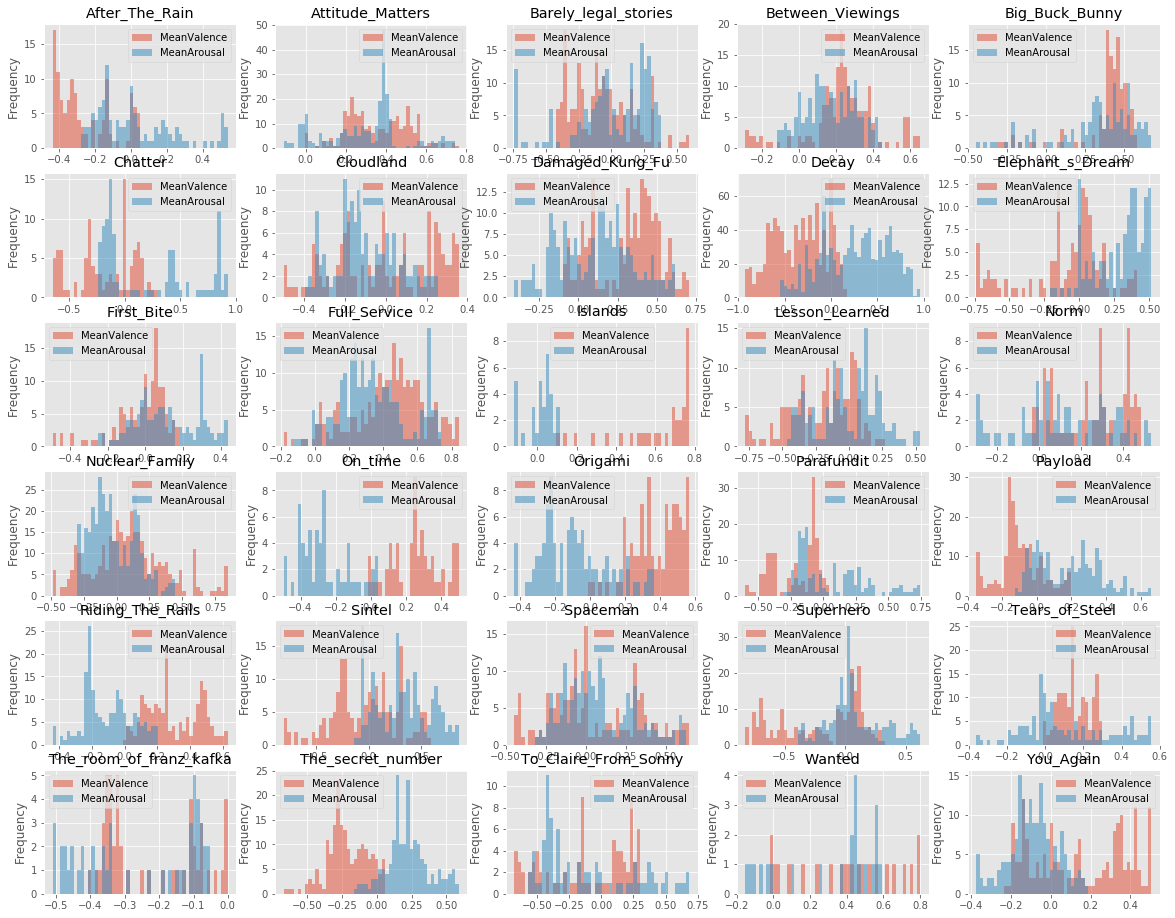

In [13]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    if (ii+1 > 30):
        plt.subplot(6,5,ii)
    else :
        plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot.hist(ax=plt.gca(),title=mov,alpha=0.5,bins=50)

## Valence , Arousal plots for Dev-Set

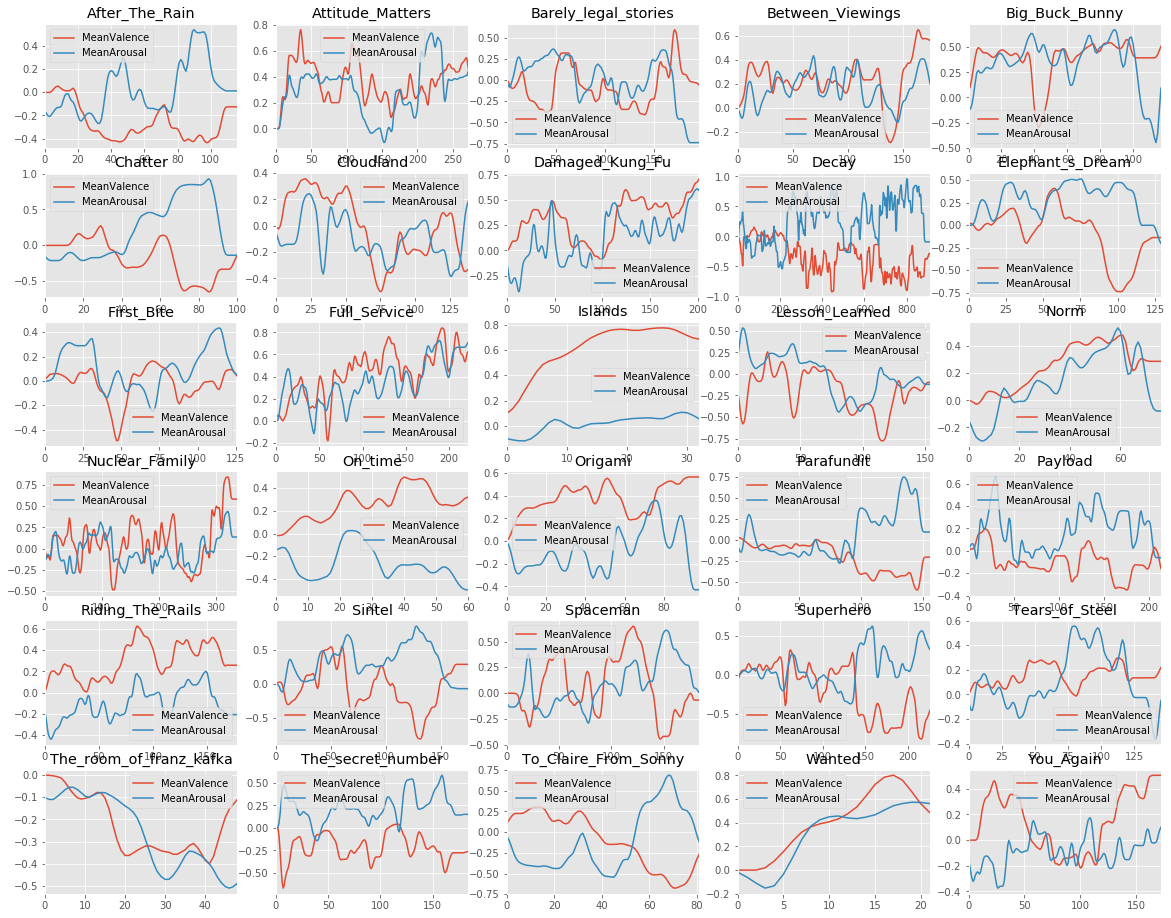

In [28]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    #.hist(alpha=0.5,bins=50)


## Fear Annotations

In [14]:
def getFearDf(movname):
    filename = os.path.join(med2017fearFolder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df


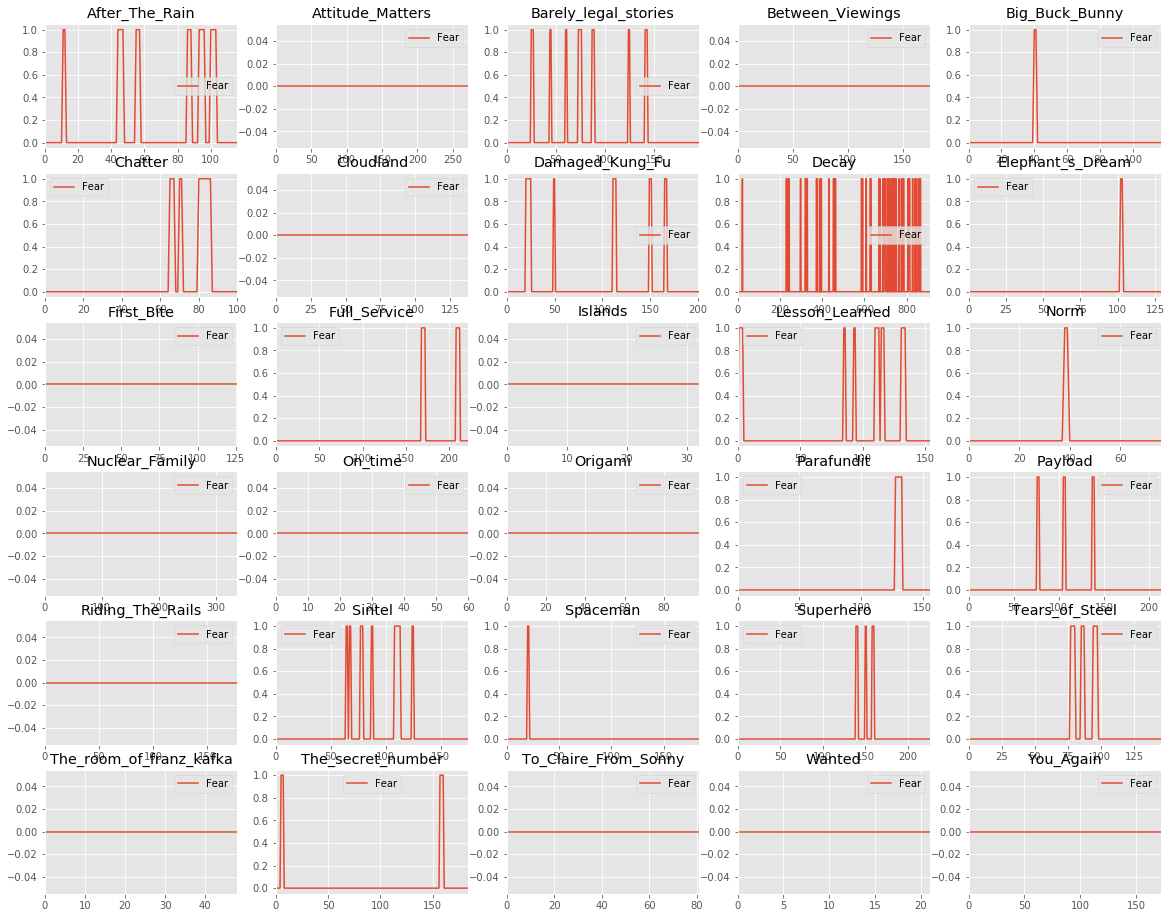

In [14]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getFearDf(mov)
    df[['Fear']].plot(ax=plt.gca(),title=mov)

## Audio Features


In [15]:
def getAudioDf(moviename,folder=med2017audiofolder):
    if 'TestSet' in folder:
        files = glob.glob(folder+moviename+'/audio_features/*.csv')
    else:
        files = glob.glob(folder+moviename+'/*.csv')
    files = sorted(files)
    files
    alist = []
    for fname in files:
        f=open(fname,'r')
        h = []
        for l in f :
            if '@attribute' in l:
                h.append(l.split()[1])
            elif l == '\n':
                l
            elif l[0] =='@':
                l
            else:
                alist.append(map(float,l.split(',')[1:])) #first attribute is string ,skipped
        f.close()
    
    return pd.DataFrame(alist,columns=h[1:])

## Visual Features

In [16]:
visual_feat = ['acc', 'cedd', 'cl', 'eh', 'fc6', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
visual_feat_wofc16 = ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [17]:
def getVisFeatureDf(moviename,typename,folder=med2017visualFeaturesfolder):
    files = glob.glob(folder+moviename+'/'+typename+'/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getAvgVisFeatureDf(moviename,typename,folder=med2017visualFeaturesfolder):
    df = getVisFeatureDf(moviename,typename,folder)
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

def getAvgVisFeatListDf(moviename,featlist,folder=med2017visualFeaturesfolder):
    df = getVisFeatureDf(moviename,featlist[0],folder)
    for feat in featlist[1:]:
        tdf = getVisFeatureDf(moviename,feat,folder)
        df = pd.concat([df,tdf],axis=1)
    
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.columns=list(range(len(dfwindow.columns)))
    return dfwindow

In [20]:
sum([len(getAnnotationDf(m)) for m in movieNames ])

5274

In [21]:
sum([len(getAudioDf(m)) for m in movieNames ])

5264

In [19]:
sum([len(getVisFeatureDf(m,'cl')) for m in movieNames ])

26589

In [20]:
sum([len(getAvgVisFeatureDf(m,'cl')) for m in movieNames ])

5271

In [ ]:
#df = getVisFeatureDf(movieNames[0],'cl')
#df = getAvgVisFeatureDf(movieNames[0],'cl')
#df = getAvgVisFeatListDf(movieNames[0],['cl','eh'])
#df.hist()

In [18]:
#df = getAvgVisFeatListDf(movieNames[0],['fc6'])
#df = getVisFeatureDf(movieNames[0],'fc6')
#df.describe()

## Face features

In [55]:
def getfacedf(movname,folder=devfacefold):
    filename = os.path.join(folder, movname + '-face.csv')
    #df = pd.read_csv(filename)
    annotation = np.genfromtxt(filename, delimiter=' ', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [76]:
def getavgfacedf(moviename,folder=devfacefold):
    df = getfacedf(moviename,folder)
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow[dfwindow < 0.00001] = 0
    return dfwindow


In [77]:
a = getavgfacedf(movieNames[0])
#a[a < 0.00001] = 0.0
a.tail()

In [67]:
getavgfacedf(movieNames[0]).tail()

0             1             2    3             4    5    \
112  8.326673e-17  1.942890e-17  8.951173e-17  0.0  1.484923e-16  0.0   
113  8.326673e-17  1.942890e-17  8.951173e-17  0.0  1.484923e-16  0.0   
114  8.326673e-17  1.942890e-17  8.951173e-17  0.0  1.484923e-16  0.0   
115  8.326673e-17  1.942890e-17  8.951173e-17  0.0  1.484923e-16  0.0   
116  8.326673e-17  1.942890e-17  8.951173e-17  0.0  1.484923e-16  0.0   

              6             7             8    9        ...       118  119  \
112  1.387779e-17  2.636780e-17  2.775558e-17  0.0      ...       0.0  0.0   
113  1.387779e-17  2.636780e-17  2.775558e-17  0.0      ...       0.0  0.0   
114  1.387779e-17  2.636780e-17  2.775558e-17  0.0      ...       0.0  0.0   
115  1.387779e-17  2.636780e-17  2.775558e-17  0.0      ...       0.0  0.0   
116  1.387779e-17  2.636780e-17  2.775558e-17  0.0      ...       0.0  0.0   

     120  121  122  123  124           125           126           127  
112  0.0  0.0  0.0  0.0  0.0  9.020562e-18  3.053113e-17  3.885781e-17  
113  0.0  0.0  0.0  0.0  0.0  9.020562e-18  3.053113e-17  3.885781e-17  
114  0.0  0.0  0.0  0.0  0.0  9.020562e-18  3.053113e-17  3.885781e-17  
115  0.0  0.0  0.0  0.0  0.0  9.020562e-18  3.053113e-17  3.885781e-17  
116  0.0  0.0  0.0  0.0  0.0  9.020562e-18  3.053113e-17  3.885781e-17  

[5 rows x 128 columns]

In [62]:
getfacedf(movieNames[0]).tail()

0    1    2    3    4    5    6    7    8    9   ...   118  119  120  \
586  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
587  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
588  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
589  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
590  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

     121  122  123  124  125  126  127  
586  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
587  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
588  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
589  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
590  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 128 columns]

In [59]:
getfacedf(testmovieNames[0],testfacefold).describe()

0            1            2            3            4    \
count  3520.000000  3520.000000  3520.000000  3520.000000  3520.000000   
mean      0.013821    -0.000086    -0.011447    -0.006332     0.017408   
std       0.042466     0.043839     0.052904     0.034156     0.045225   
min      -0.140135    -0.203644    -0.293030    -0.212299    -0.138061   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.235327     0.289223     0.206275     0.178208     0.234303   

               5            6            7            8            9    \
count  3520.000000  3520.000000  3520.000000  3520.000000  3520.000000   
mean      0.031790    -0.007221     0.015267    -0.005923    -0.005735   
std       0.062028     0.032118     0.046068     0.037489     0.043724   
min      -0.090027    -0.185455    -0.207314    -0.259365    -0.289716   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.032538     0.000000     0.000000     0.000000     0.000000   
max       0.289279     0.172678     0.252821     0.129076     0.215384   

          ...               118          119          120          121  \
count     ...       3520.000000  3520.000000  3520.000000  3520.000000   
mean      ...          0.004772     0.030522     0.005149     0.014005   
std       ...          0.034358     0.057206     0.030726     0.048243   
min       ...         -0.181683    -0.059783    -0.140735    -0.211714   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     0.000000   
75%       ...          0.000000     0.037425     0.000000     0.000000   
max       ...          0.188132     0.242583     0.191140     0.270350   

               122          123          124          125          126  \
count  3520.000000  3520.000000  3520.000000  3520.000000  3520.000000   
mean      0.014050     0.008369     0.011253    -0.004104     0.024502   
std       0.046843     0.032609     0.049489     0.030660     0.056578   
min      -0.177958    -0.105689    -0.254731    -0.166638    -0.168845   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.255607     0.190530     0.224407     0.203740     0.326261   

               127  
count  3520.000000  
mean      0.007756  
std       0.037427  
min      -0.166444  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.210690  

[8 rows x 128 columns]

## Train and Test set creation

In [82]:
def getFeatureswFearDf(movieNames,featlist=visual_feat_wofc16):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist)
    Xa = getAudioDf(movieNames[0])
    Xd = getAvgVisFeatListDf(movieNames[0],['fc6'])
    Xf = getavgfacedf(movieNames[0])
    y = getFearDf(movieNames[0])[['Fear']]
    
    mlen = min(len(Xv),len(Xa), len(Xd),len(Xf),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    Xd = Xd[:mlen]
    Xf = Xf[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        tXd = getAvgVisFeatListDf(mov,['fc6'])
        tXf = getavgfacedf(mov)
        ty = getFearDf(mov)[['Fear']]
        
        mlen = min(len(tXv),len(tXa),len(tXd),len(tXf),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        tXd = tXd[:mlen]
        tXf = tXf[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        Xd = Xd.append(tXd)
        Xf = Xf.append(tXf)
        y  = y.append(ty)
        
    return Xv,Xa,Xd,Xf,y

In [80]:
def getFeatureswAnnotationsDf(movieNames,featlist=visual_feat_wofc16):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist)
    Xa = getAudioDf(movieNames[0])
    Xd = getAvgVisFeatListDf(movieNames[0],['fc6'])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa), len(Xd),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    Xd = Xd[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        tXd = getAvgVisFeatListDf(mov,['fc6'])
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(tXd),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        tXd = tXd[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        Xd = Xd.append(tXd)
        y  = y.append(ty)
        
    return Xv,Xa,Xd,y

In [21]:
def df2mat(df):
    return df.as_matrix().reshape((len(df),))


# Classification work

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import cross_validation
from sklearn import metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

def getGridCV(pipe,paramgirid,Xtrain,ytrain): # scoring ?
    grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=125)
    grid.fit(Xtrain,ytrain)
    
    return grid



/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [23]:
def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [90]:
def getclsmetrics(ytest,y_pred):
    print('Report')
    print(metrics.classification_report(ytest,y_pred))

    apr = metrics.average_precision_score(ytest,y_pred, average='macro')
    acc = metrics.accuracy_score(ytest,y_pred)

    print('Accuracy: {}'.format(acc))
    print('Average Precision:{} '.format(apr))
    
    return apr,acc


In [83]:
trainlist, testlist=gettraintest2movielist(1,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
tXv,tXa,tXd,tXf,ty = getFeatureswFearDf(trainlist)
print(tXv.shape,tXa.shape,tXd.shape,tXf.shape,ty.shape)
testXv, testXa, testXd,testXf, testy = getFeatureswFearDf(testlist)
print(testXv.shape, testXa.shape,testXd.shape,testXf.shape, testy.shape)


(3783, 1271) (3783, 1583) (3783, 4096) (3783, 128) (3783, 1)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 1)


In [172]:
allXv,allXa,allXd,allXf, ally = getFeatureswFearDf(movieNames)
print(allXv.shape,allXa.shape,allXd.shape,allXf.shape,ally.shape)

X_train, X_test, y_train, y_test = train_test_split(tXv, ty,test_size=0.2, random_state=0)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(tXa, ty,test_size=0.2, random_state=0)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(tXd, ty,test_size=0.2, random_state=0)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(tXf, ty,test_size=0.2, random_state=0)


(5264, 1271) (5264, 1583) (5264, 4096) (5264, 128) (5264, 1)


In [175]:
X_train.head()

0     1     2     3     4     5     6     7     8     9     ...     1261  \
74   13.8  13.1  12.1  11.7  14.3  13.6  12.9  12.1  13.7  12.6  ...     88.6   
58   11.1   9.2   7.6   6.6   9.6   7.0   5.0   4.1  12.6  11.0  ...    106.2   
4    15.0  15.0  15.0  15.0   6.4   3.6   2.9   2.8   0.7   0.2  ...     16.2   
186  14.3  13.4  12.5  12.1   7.5   4.4   2.9   2.3   4.3   1.7  ...    152.4   
50    8.7   6.5   5.6   5.0  13.2  11.8  10.6   9.9  14.1  12.9  ...     96.8   

      1262   1263   1264   1265   1266  1267   1268   1269   1270  
74   147.6  125.9   94.2   88.8  120.6  98.1  122.4  138.0  144.8  
58   178.2  117.6   98.7   92.4  112.5  77.8   75.5   77.1   67.6  
4    132.7   32.2   16.1   17.3   35.0   5.9    3.2    6.0   24.3  
186  192.2  183.9  164.7  152.3  134.3  98.5   92.9   97.5   90.9  
50   140.3  102.1   98.1   85.9   96.6  81.0   86.6   87.7   86.9  

[5 rows x 1271 columns]

In [176]:
Xf_train.head()

0    1    2    3         4         5         6         7         8    \
74   0.0  0.0  0.0  0.0  0.013203  0.003789  0.007293  0.008864  0.011575   
58   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
186  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
50   0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

     9      ...          118       119  120       121  122       123  124  \
74   0.0    ...     0.000741  0.022657  0.0  0.000518  0.0  0.006256  0.0   
58   0.0    ...     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0   
4    0.0    ...     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0   
186  0.0    ...     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0   
50   0.0    ...     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0   

          125  126       127  
74   0.005322  0.0  0.004602  
58   0.000000  0.0  0.000000  
4    0.000000  0.0  0.000000  
186  0.000000  0.0  0.000000  
50   0.000000  0.0  0.000000  

[5 rows x 128 columns]

## GridSearch Face-Fear

In [178]:
param_test3 = {'min_samples_split':list(range(1000,2100,200)), 'min_samples_leaf':list(range(30,71,10))}

pipegrad = GradientBoostingClassifier(learning_rate=0.05, 
                           n_estimators=60,max_depth=9,
                           max_features='sqrt', subsample=0.8, 
                           random_state=10) 

gsearch_facefear = GridSearchCV(pipegrad , param_grid = param_test3, 
                                 scoring='average_precision',n_jobs=-1,iid=False, cv=5)
gsearch_facefear.fit(tXf,ty.Fear)
#gsearch_facefear.fit(Xa_train,ya_train)
gsearch_facefear.best_params_


ImportError: [joblib] Attempting to do parallel computing without protecting your import on a system that does not support forking. To use parallel-computing in a script, you must protect your main loop using "if __name__ == '__main__'". Please see the joblib documentation on Parallel for more information

In [179]:
gboost_facefear = GradientBoostingClassifier(
    min_samples_leaf=30,
    min_samples_split=2000,
    learning_rate=0.05, 
    n_estimators=60,max_depth=9,
    max_features='sqrt', subsample=0.8, random_state=10)
#gboost_facefear.fit(tXf,ty.Fear)
gboost_facefear.fit(Xf_tra,ty.Fear)

y_pred = gboost_facefear.predict(testXf)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1380
          1       0.00      0.00      0.00        54

avg / total       0.93      0.96      0.94      1434

Visual Logistic Accuracy: 0.9623430962343096
AVP:0.5188284518828452 


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.51882845188284521, 0.96234309623430958)

In [117]:
trainlist, testlist=gettraintest2movielist(2,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
tXv,tXa,tXd,tXf,ty = getFeatureswFearDf(trainlist)
print(tXv.shape,tXa.shape,tXd.shape,tXf.shape,ty.shape)
testXv, testXa, testXd,testXf, testy = getFeatureswFearDf(testlist)
print(testXv.shape, testXa.shape,testXd.shape,testXf.shape, testy.shape)


(2918, 1271) (2918, 1583) (2918, 4096) (2918, 128) (2918, 1)
(1434, 1271) (1434, 1583) (1434, 4096) (1434, 128) (1434, 1)


In [123]:
gboost_facefear.fit(tXf,ty.Fear)

y_pred = gboost_facefear.predict(testXf)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1380
          1       0.00      0.00      0.00        54

avg / total       0.93      0.96      0.94      1434

Visual Logistic Accuracy: 0.9623430962343096
AVP:0.5188284518828452 


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.51882845188284521, 0.96234309623430958)

In [131]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001, 0.01, 1, 10],
     'classifier__C': [0.01, 1, 10,100]},
]
grid_audiofear = GridSearchCV(pipe, param_grid, 
                    scoring='average_precision',n_jobs=-1,iid=False, cv=5)
grid_audiofear.fit(tXf,ty.Fear)
print("Best params:\n{}\n".format(grid_audiofear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audiofear.best_score_))
#grid.grid_scores_, grid.best_params_, grid.best_score_

Best params:
{'classifier': SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 0.01, 'classifier__gamma': 10, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.15


In [135]:
pipe_svc_face_fear = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True), 
    SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))

pipe_svc_face_fear.fit(tXf,ty.Fear)
y_pred = pipe_svc_face_fear.predict(testXf)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1380
          1       0.00      0.00      0.00        54

avg / total       0.93      0.96      0.94      1434

Visual Logistic Accuracy: 0.9623430962343096
AVP:0.5188284518828452 


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.51882845188284521, 0.96234309623430958)

In [163]:
testy.Fear.value_counts()

0    1380
1      54
Name: Fear, dtype: int64

In [154]:
pipe_face_fear = make_pipeline(
   # StandardScaler(),
   #PCA(n_components=30),
    LogisticRegression()
    )

pipe_face_fear.fit(tXf,ty.Fear)
y_pred = pipe_face_fear.predict(testXf)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1380
          1       0.00      0.00      0.00        54

avg / total       0.93      0.96      0.94      1434

Visual Logistic Accuracy: 0.9623430962343096
AVP:0.5188284518828452 


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.51882845188284521, 0.96234309623430958)

In [170]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=40,random_state=0)
tree.fit(tXa,ty.Fear)
print("Accuracy on training set: {:.3f}".format(tree.score(tXa,ty.Fear)))
print("Accuracy on test set: {:.3f}".format(tree.score(testXa, testy.Fear)))
y_pred = tree.predict(testXa)
getclsmetrics(testy.Fear,y_pred)

Accuracy on training set: 1.000
Accuracy on test set: 0.894
Report
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      1380
          1       0.06      0.13      0.08        54

avg / total       0.93      0.89      0.91      1434

Visual Logistic Accuracy: 0.8940027894002789
AVP:0.11245254145358748 


(0.11245254145358748, 0.89400278940027889)

/home/deepuser/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


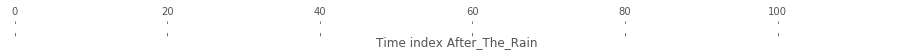

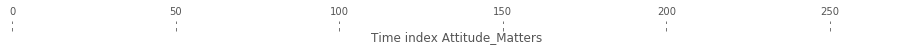

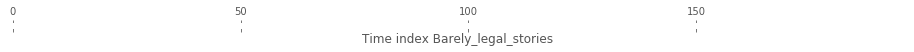

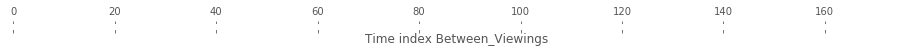

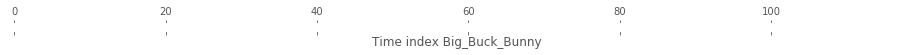

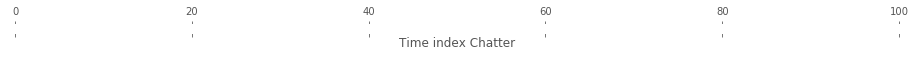

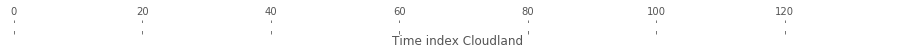

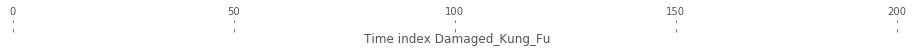

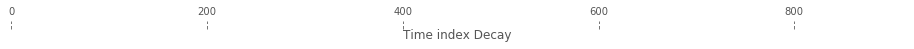

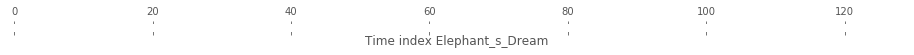

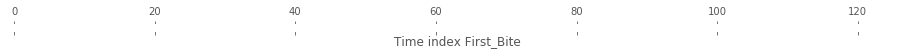

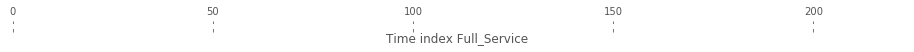

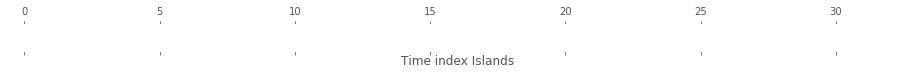

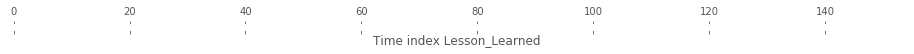

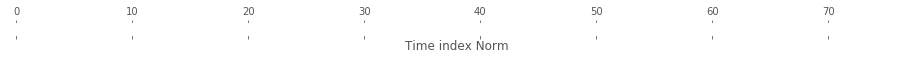

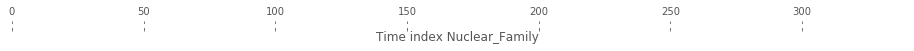

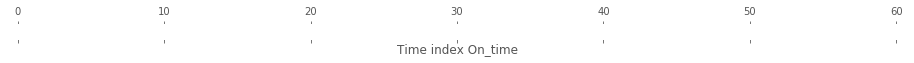

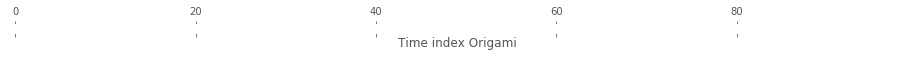

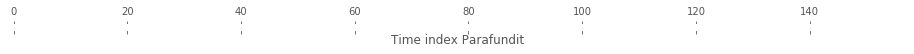

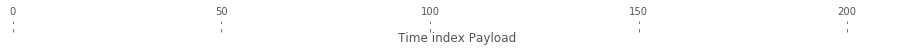

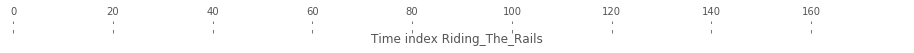

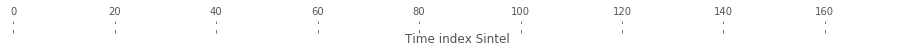

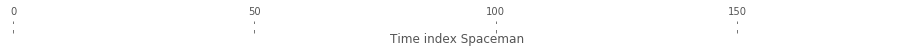

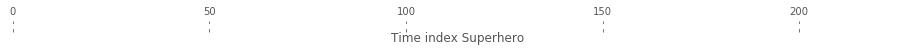

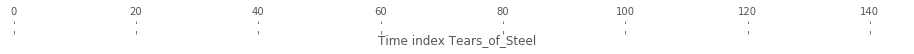

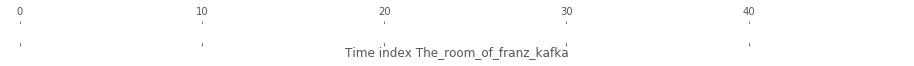

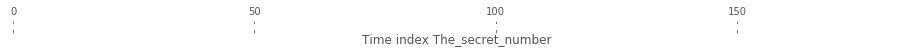

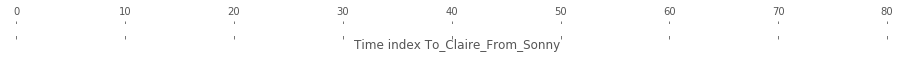

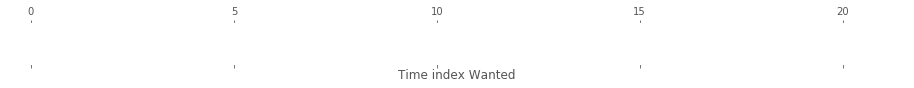

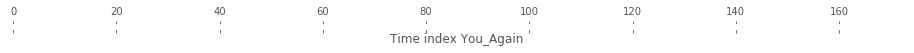

In [171]:
plt.figure()
for f in movieNames:
    df = getavgfacedf(f)
    ff = gboost_facefear.predict(df)
    plt.matshow(pd.DataFrame(ff).transpose(), cmap='gray_r')
    plt.xlabel("Time index "+f)
    plt.yticks(())

## GridSearch Audio-Fear

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

#pipe = make_pipeline(LogisticRegression())
#param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}



In [150]:
##('preprocessing', StandardScaler()), ('red_dim', PCA(n_components=400)),

pipe = Pipeline([('classifier', LogisticRegression())])

param_grid = [
    {'classifier__C': [ 0.01,0.1,1,10]}
]
grid_audiofear = GridSearchCV(pipe, param_grid, 
                    scoring='average_precision',n_jobs=-1,iid=False, cv=5)
grid_audiofear.fit(tXa,ty.Fear)
print("Best params:\n{}\n".format(grid_audiofear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audiofear.best_score_))


Process ForkPoolWorker-2309:
Process ForkPoolWorker-2359:
Process ForkPoolWorker-2352:
Process ForkPoolWorker-2357:
Process ForkPoolWorker-2367:
Process ForkPoolWorker-2355:
Process ForkPoolWorker-2315:
Process ForkPoolWorker-2316:
Traceback (most recent call last):
Process ForkPoolWorker-2326:
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Process ForkPoolWorker-2338:
Traceback (most recent call last):
Process ForkPoolWorker-2348:
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-2376:
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Proces

KeyboardInterrupt: 

Process ForkPoolWorker-2344:
Traceback (most recent call last):
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
Process ForkPoolWorker-2365:
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-2341:
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-2321:
KeyboardInterrupt
Process ForkPoolWorker-2322:
KeyboardInterrupt
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Process ForkPoolWorker-2372:
Process ForkPool

KeyboardInterrupt
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
 

  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3

  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/deepuser/anacond

  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/deepuser/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/deepuser/anaconda3/lib/pyth

In [152]:
%%time
pipe_svc_audio_fear = make_pipeline(
   # StandardScaler(),
   PCA(n_components=30),
    LogisticRegression()
    )

pipe_svc_audio_fear.fit(tXa,ty.Fear)
y_pred = pipe_svc_audio_fear.predict(testXa)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1380
          1       0.00      0.00      0.00        54

avg / total       0.93      0.96      0.94      1434

Visual Logistic Accuracy: 0.9623430962343096
AVP:0.5188284518828452 
CPU times: user 1min 50s, sys: 488 ms, total: 1min 51s
Wall time: 2.06 s


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
param_test3 = {'min_samples_split':list(range(1000,2100,200)), 'min_samples_leaf':list(range(30,71,10))}

pipegrad = GradientBoostingClassifier(learning_rate=0.05, 
                           n_estimators=60,max_depth=9,
                           max_features='sqrt', subsample=0.8, 
                           random_state=10) 

gsearch_audiofear = GridSearchCV(pipegrad , param_grid = param_test3, 
                                 scoring='average_precision',n_jobs=-1,iid=False, cv=5)
gsearch_audiofear.fit(tXa,ty.Fear)
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'min_samples_split': [1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='average_precision',
       verbose=0)

In [105]:
#gsearch_audiofear.grid_scores_
gsearch_audiofear.best_params_

{'min_samples_leaf': 40, 'min_samples_split': 1200}

In [106]:
gboost_audiofear = GradientBoostingClassifier(
    min_samples_leaf=40,
    min_samples_split=1200,
    learning_rate=0.05, 
    n_estimators=60,max_depth=9,
    max_features='sqrt', subsample=0.8, random_state=10)
gboost_audiofear.fit(tXa,ty.Fear)

y_pred = gboost_audiofear.predict(testXa)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1426
          1       0.00      0.00      0.00        55

avg / total       0.93      0.96      0.94      1481

Visual Logistic Accuracy: 0.962862930452397
AVP:0.5185685347738015 


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.51856853477380149, 0.96286293045239701)

In [107]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001, 0.01, 1, 10],
     'classifier__C': [0.01, 1, 10,100]},
]

grid_audiofear = GridSearchCV(pipe, param_grid, 
                    scoring='average_precision',n_jobs=-1,iid=False, cv=5)

grid_audiofear.fit(tXa,ty.Fear)

print("Best params:\n{}\n".format(grid_audiofear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audiofear.best_score_))
#grid.grid_scores_, grid.best_params_, grid.best_score_

Best params:
{'classifier': SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 0.01, 'classifier__gamma': 1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.53


In [108]:

pipe_svc_audio_fear = make_pipeline(
    StandardScaler(), 
    SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False))

pipe_svc_audio_fear.fit(tXa,ty.Fear)
y_pred = pipe_svc_audio_fear.predict(testXa)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1426
          1       0.00      0.00      0.00        55

avg / total       0.93      0.96      0.94      1481

Visual Logistic Accuracy: 0.962862930452397
AVP:0.5185685347738015 


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.51856853477380149, 0.96286293045239701)

In [102]:

pipe = Pipeline([('classifier', RandomForestClassifier())])

param_grid = [
    {
     'classifier__n_estimators': [50,100,300],
     'classifier__max_features': [3,5,10]}
]

grid_audiofear = GridSearchCV(pipe, param_grid, 
                    scoring='average_precision',n_jobs=-1,iid=False, cv=5)

grid_audiofear.fit(tXa,ty.Fear)

print("Best params:\n{}\n".format(grid_audiofear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audiofear.best_score_))
#grid.grid_scores_, grid.best_params_, grid.best_score_

Best params:
{'classifier__max_features': 5, 'classifier__n_estimators': 50}

Best cross-validation score: 0.08


In [103]:
forest_audiofear = RandomForestClassifier(max_features=5,n_estimators=50)
forest_audiofear.fit(tXa,ty.Fear)
y_pred = forest_audiofear.predict(testXa)
getclsmetrics(testy.Fear,y_pred)

Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1426
          1       0.00      0.00      0.00        55

avg / total       0.93      0.96      0.94      1481

Visual Logistic Accuracy: 0.962862930452397
AVP:0.5185685347738015 


/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.51856853477380149, 0.96286293045239701)

In [ ]:
from joblib import Parallel, delayed

import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...


def processGroupx(ii,pipe, modality):
    
    #rows = []
    trainlist, testlist=gettraintest2movielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
    print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
    testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
    print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_fear_pipe(pipe, 
                                           tXv, ty, 
                                           testXv,testy)
    else:
        y_pred_test,mse,prs,p1 = evaluate_fear_pipe(pipe, 
                                           tXa, ty, 
                                           testXa, testy)
        
    return [ii,mse,prs]

def crossgroupsx(pipe,valorar,modality):
    #inputs=range(len(movgroups))
    inputs=[1, 2, 3, 4, 5]
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(delayed(processGroupx)(i,pipe,valorar,modality) for i in inputs)
    pipescores = pd.DataFrame(results,columns=['test-group','MSE','PCC'])

    return pipescores


# Regression work

In [ ]:
#trainlist, testlist=gettraintestmovielist(2,movgroups_wodecay)  # index 1 olanları test , diğerlerini train yapan fonksiyon
#trainlist, testlist
#for ii in range(len(movgroups)):
#    trnlist, tstlist=gettraintestmovielist(ii)

In [ ]:
%%time
allXv,allXa,allXd,ally = getFeatureswAnnotationsDf(movieNames)
print(allXv.shape,allXa.shape,allXd.shape,ally.shape)

In [25]:
trainlist, testlist=gettraintest2movielist(2)  # index 1 olanları test , diğerlerini train yapan fonksiyon

tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

X_train, X_test, y_train, y_test = train_test_split(tXv, ty,test_size=0.2, random_state=0)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(tXa, ty,test_size=0.2, random_state=0)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(tXd, ty,test_size=0.2, random_state=0)


(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)


In [27]:
#ytrainarrayVal = ty[['MeanValence']].as_matrix().reshape((len(ty),))
#ytrainarrayAr = ty[['MeanArousal']].as_matrix().reshape((len(ty),))

#ytestarrayVal = testy[['MeanValence']].as_matrix().reshape((len(testy),))
#ytestarrayAr = testy[['MeanArousal']].as_matrix().reshape((len(testy),))


In [114]:
#tXv,tXa,ty = getMovListAudioVisFeatListwAnnotationsDf(movieNames,['cl','gabor'])
#tXv.shape,tXa.shape,ty.shape

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(tXv, ty,test_size=0.32, random_state=0)

#Xa_train, Xa_test, ya_train, ya_test = train_test_split(tXa, ty,test_size=0.2, random_state=0)

#Xd_train, Xd_test, yd_train, yd_test = train_test_split(tXd, ty,test_size=0.2, random_state=0)


In [29]:
#y_train.head()

## Linear Regression - Valence

In [26]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
visual_regr = linear_model.LinearRegression()
audio_regr = linear_model.LinearRegression()
nn_regr = linear_model.LinearRegression()

# Train the model using the training sets
visual_regr.fit(X_train, y_train[['MeanValence']].as_matrix().reshape((len(y_train))))
audio_regr.fit(Xa_train, ya_train[['MeanValence']].as_matrix().reshape((len(ya_train))))
nn_regr.fit(Xd_train, yd_train[['MeanValence']].as_matrix().reshape((len(yd_train))))

# Make predictions using the testing set
visual_y_pred = visual_regr.predict(X_test)
audio_y_pred = audio_regr.predict(Xa_test)
nn_y_pred = nn_regr.predict(Xd_test)



In [27]:
# The coefficients
print('Visual Coefficients: \n', visual_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(y_test[['MeanValence']]), visual_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(y_test[['MeanValence']]),visual_y_pred))

print('pearson score  ',pearsonr(df2mat(y_test[['MeanValence']]),visual_y_pred))

print('Audio Coefficients: \n', audio_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(ya_test[['MeanValence']]), audio_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(ya_test[['MeanValence']]),audio_y_pred))

print('pearson score  ',pearsonr(df2mat(ya_test[['MeanValence']]),audio_y_pred))

print('FC16 Coefficients: \n', nn_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(yd_test[['MeanValence']]), nn_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(yd_test[['MeanValence']]),nn_y_pred))

print('pearson score  ',pearsonr(df2mat(yd_test[['MeanValence']]),nn_y_pred))

Visual Coefficients: 
 [  1.06277260e+10  -2.83711709e+09  -2.22038616e+09 ...,  -4.13167577e+07
   1.29572398e+08   1.34536619e+08]
Mean squared error: 1055267370103678173184.00
Variance score: -9137171928993699463168.00
pearson score   (0.28765305802928304, 7.7883961553422569e-19)
Audio Coefficients: 
 [ -1.17014742e-04   2.71320862e-04  -1.18037548e-03 ...,   5.33431134e-03
  -1.77596474e-01   1.17141196e-01]
Mean squared error: 21.28
Variance score: -183.22
pearson score   (0.093510038180783697, 0.004709458724303138)
FC16 Coefficients: 
 [ -8.63207122e-04  -2.08089871e-05  -1.03941689e-03 ...,  -1.34029549e-02
  -4.64734399e-02   8.85551269e-03]
Mean squared error: 0.19
Variance score: -0.63
pearson score   (0.56461726539182155, 6.4807509973164307e-78)


## Grid Search on Visual Features- Valence

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def getGridCV(pipe,paramgirid,Xtrain,ytrain): # scoring ?
    grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=125)
    grid.fit(Xtrain,ytrain)
    
    return grid

    

/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
%%time

#X_train, X_test, y_train, y_test 
#pipe = Pipeline([('preprocessing', StandardScaler()),('reduce_dim', PCA()) ,('classifier', SVR())])
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 
     'preprocessing': [StandardScaler()],
#     'reduce_dim': [PCA()],
#     'reduce_dim__n_components' : [ 800],
     'classifier__gamma': [0.0001, 0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100,200]},
    {'classifier': [RandomForestRegressor(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [3,5,10]}]

grid_vis_valence = getGridCV(pipe,param_grid,X_train,df2mat(y_train[['MeanValence']]))

print("Best params:\n{}\n".format(grid_vis_valence.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_vis_valence.best_score_))
print("All grid scores")

grid_vis_valence.grid_scores_, grid_vis_valence.best_params_, grid_vis_valence.best_score_

Best params:
{'classifier': SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.80
All grid scores
CPU times: user 1min 40s, sys: 7.99 s, total: 1min 48s
Wall time: 2min 36s


In [35]:
tXv.shape,tXa.shape,ty.shape,
testXv.shape, testXa.shape, testy.shape

((708, 1271), (708, 1583), (708, 2))

In [34]:
#scores[0]
#scores.to_csv('grid_vis_valence.txt')

In [25]:
def gridscores(grid):
    scores = grid.grid_scores_
    rows = []
    params = sorted(scores[0].parameters)
    for row in scores:
        mean = row.mean_validation_score
        std = row.cv_validation_scores.std()
        rows.append([mean, std] + [row.parameters['classifier']])
    scores = pd.DataFrame(rows, columns=['mean_', 'std_'] + ['classifier'])
    #scores.to_csv(filename)
    return scores

In [38]:
gridscores(grid_vis_valence).head()

mean_      std_                                         classifier
0  0.027756  0.002676  SVR(C=0.001, cache_size=200, coef0=0.0, degree...
1  0.090598  0.006459  SVR(C=0.001, cache_size=200, coef0=0.0, degree...
2  0.007033  0.002441  SVR(C=0.001, cache_size=200, coef0=0.0, degree...
3 -0.001896  0.002285  SVR(C=0.001, cache_size=200, coef0=0.0, degree...
4 -0.002034  0.002289  SVR(C=0.001, cache_size=200, coef0=0.0, degree...

## Metrics and Paralell crossvalidation

In [22]:
from sklearn import metrics
from scipy.stats import pearsonr

def getMetrics(y,y_pred):
    # calculate MAE using scikit-learn
    #mae = metrics.mean_absolute_error(ytestarray, y_pred)
    #print("MAE score: {:.5f}".format(mae))
    
    mse = metrics.mean_squared_error(y, y_pred)
    # calculate MSE using scikit-learn
    print("MSE score: {:.5f}".format(mse))

    # calculate RMSE using scikit-learn
    #print("RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(ytestarray, y_pred))))

    print("Pearson score:")
    prs = pearsonr(y,y_pred)
    print(prs)
    
    return mse,prs

In [23]:
def evaluate_pipe(pipe,trainX,trainy,testX,testy):
    
    ytrainarray = trainy.as_matrix().reshape((len(trainy),))
    ytestarray = testy.as_matrix().reshape((len(testy),))

    pipe.fit(trainX, ytrainarray)
    
    print("Train score: {:.2f}".format(pipe.score(trainX, ytrainarray)))
    print("Test score: {:.2f}".format(pipe.score(testX, ytestarray)))

    y_pred = pipe.predict(testX)

    mse, prs = getMetrics(ytestarray,y_pred)
    
    return y_pred,mse,prs[0],pipe

In [24]:
from joblib import Parallel, delayed

import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...

def trainPipe(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintest2movielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
    print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
    testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
    print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    else:
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
        
    return ii,mse,prs,p1

def processGroup(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintest2movielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
    print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
    testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
    print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    else:
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
        
    return [ii,mse,prs]

def crossgroups(pipe,valorar,modality):
    #inputs=range(len(movgroups))
    inputs=[1, 2, 3, 4, 5]
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(delayed(processGroup)(i,pipe,valorar,modality) for i in inputs)
    pipescores = pd.DataFrame(results,columns=['test-group','MSE','PCC'])

    return pipescores


In [29]:
#trainlist, testlist=gettraintest2movielist(2,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
#trainlist

In [42]:
%%time
pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pvv_scores = crossgroups(pipe_visual_valence,'MeanValence','visual')


(3830, 1271) (3830, 1583) (3830, 4096) (3830, 2)
(3818, 1271) (3818, 1583) (3818, 4096) (3818, 2)
(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(3827, 1271) (3827, 1583) (3827, 4096) (3827, 2)
(3836, 1271) (3836, 1583) (3836, 4096) (3836, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
(1434, 1271) (1434, 1583) (1434, 4096) (1434, 2)
(1446, 1271) (1446, 1583) (1446, 4096) (1446, 2)
(1437, 1271) (1437, 1583) (1437, 4096) (1437, 2)
(1428, 1271) (1428, 1583) (1428, 4096) (1428, 2)
Train score: 0.95
Train score: 0.95
Train score: 0.95
Test score: -0.28
Train score: 0.95
Train score: 0.95
Test score: -0.61
Test score: -0.73
MSE score: 0.15104
Pearson score:
(0.098063758386006283, 0.00019983404756287757)
Test score: -0.37
Test score: -0.42
MSE score: 0.12758
Pearson score:
(-0.012549373618277473, 0.62940936438369222)
MSE score: 0.15579
Pearson score:
(0.39415670149140347, 6.0520934336701606e-55)
MSE score: 0.16042
Pearson score:
(0.0040531235120871137, 0.8783749874653024)
MSE score: 0

In [43]:
%%time
pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pav_scores = crossgroups(pipe_visual_arousal,'MeanArousal','visual')


(3818, 1271) (3818, 1583) (3818, 4096) (3818, 2)
(3830, 1271) (3830, 1583) (3830, 4096) (3830, 2)
(3827, 1271) (3827, 1583) (3827, 4096) (3827, 2)
(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(3836, 1271) (3836, 1583) (3836, 4096) (3836, 2)
(1437, 1271) (1437, 1583) (1437, 4096) (1437, 2)
(1446, 1271) (1446, 1583) (1446, 4096) (1446, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
(1434, 1271) (1434, 1583) (1434, 4096) (1434, 2)
(1428, 1271) (1428, 1583) (1428, 4096) (1428, 2)
Train score: 0.92
Train score: 0.93
Train score: 0.93
Train score: 0.93
Train score: 0.93
Test score: -0.12
Test score: -0.22
Test score: -0.15
Test score: -0.35
Test score: -0.20
MSE score: 0.09909
Pearson score:
(0.10939214685864977, 3.0634481671546512e-05)
MSE score: 0.07402
Pearson score:
(0.044763955738451475, 0.089833634273301627)
MSE score: 0.09818
Pearson score:
(0.053821758533858961, 0.041566686286989299)
MSE score: 0.08112
Pearson score:
(0.14151114465619502, 4.530283935226392e-08)
MSE score: 0.

In [36]:
%%time
pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)
pva_scores = crossgroups(pipe_audio_valence,'MeanValence','audio')


(3818, 1271) (3818, 1583) (3818, 4096) (3818, 2)
(3830, 1271) (3830, 1583) (3830, 4096) (3830, 2)
(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(3836, 1271) (3836, 1583) (3836, 4096) (3836, 2)
(3827, 1271) (3827, 1583) (3827, 4096) (3827, 2)
(1446, 1271) (1446, 1583) (1446, 4096) (1446, 2)
(1428, 1271) (1428, 1583) (1428, 4096) (1428, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
(1434, 1271) (1434, 1583) (1434, 4096) (1434, 2)
(1437, 1271) (1437, 1583) (1437, 4096) (1437, 2)
Train score: 0.93
Train score: 0.93
Train score: 0.94
Train score: 0.93
Train score: 0.94
Test score: -0.43
Test score: -0.02
Test score: -0.22
Test score: -0.04
Test score: -0.03
MSE score: 0.12825
Pearson score:
(0.21511331755321675, 1.3408213910912206e-16)
MSE score: 0.11934
Pearson score:
(0.2377148492950838, 8.5516100377772305e-20)
MSE score: 0.09649
Pearson score:
(0.19071660961172418, 1.3482767640132139e-13)
MSE score: 0.12313
Pearson score:
(0.21517994508296584, 1.7503029564838813e-16)
MSE score: 

In [37]:
%%time
pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    #PCA(n_components=800),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)
paa_scores = crossgroups(pipe_audio_arousal,'MeanArousal','audio')


(3818, 1271) (3818, 1583) (3818, 4096) (3818, 2)
(3830, 1271) (3830, 1583) (3830, 4096) (3830, 2)
(3827, 1271) (3827, 1583) (3827, 4096) (3827, 2)
(3836, 1271) (3836, 1583) (3836, 4096) (3836, 2)
(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(1437, 1271) (1437, 1583) (1437, 4096) (1437, 2)
(1428, 1271) (1428, 1583) (1428, 4096) (1428, 2)
(1434, 1271) (1434, 1583) (1434, 4096) (1434, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
(1446, 1271) (1446, 1583) (1446, 4096) (1446, 2)
Train score: 0.91
Train score: 0.92
Train score: 0.90
Train score: 0.91
Train score: 0.90
Test score: 0.04
Test score: -0.01
Test score: -0.09
Test score: -0.06
Test score: -0.11
MSE score: 0.08952
Pearson score:
(0.193804491430635, 1.0545379712786964e-13)
MSE score: 0.05775
Pearson score:
(0.37670638887075969, 3.8682936818061836e-51)
MSE score: 0.06603
Pearson score:
(0.15657884026331206, 2.4131042754090073e-09)
MSE score: 0.09081
Pearson score:
(0.11444228933541906, 1.3976939487445362e-05)
MSE score: 0.

In [55]:
paa_scores.sort_values('PCC', ascending=False)

test-group       MSE       PCC
0           1  0.057745  0.376706
3           4  0.089518  0.193804
2           3  0.066033  0.156579
4           5  0.074860  0.148383
1           2  0.090814  0.114442

In [56]:
pav_scores.sort_values('PCC', ascending=False)

test-group       MSE       PCC
0           1  0.081118  0.141511
3           4  0.099094  0.109392
4           5  0.081226  0.077179
1           2  0.098177  0.053822
2           3  0.074017  0.044764

In [57]:
pva_scores.sort_values('PCC', ascending=False)

test-group       MSE       PCC
2           3  0.094496  0.253409
4           5  0.119336  0.237715
1           2  0.123127  0.215180
3           4  0.128253  0.215113
0           1  0.096494  0.190717

In [58]:
pvv_scores.sort_values('PCC', ascending=False)

test-group       MSE       PCC
3           4  0.155790  0.394157
1           2  0.151044  0.098064
4           5  0.160417  0.004053
0           1  0.127578 -0.012549
2           3  0.130537 -0.030471

## Pipeline train

In [27]:
%%time
pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    #PCA(n_components=800),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 428 µs


In [28]:
ii1,mse1,prs1,pva = trainPipe(4,pipe_visual_valence,'MeanValence','visual')
ii2,mse2,prs2,pvv = trainPipe(3,pipe_audio_valence,'MeanValence','audio')



(3818, 1271) (3818, 1583) (3818, 4096) (3818, 2)
(1446, 1271) (1446, 1583) (1446, 4096) (1446, 2)
Train score: 0.95
Test score: -0.73
MSE score: 0.15579
Pearson score:
(0.39415670149140347, 6.0520934336701606e-55)
(3827, 1271) (3827, 1583) (3827, 4096) (3827, 2)
(1437, 1271) (1437, 1583) (1437, 4096) (1437, 2)
Train score: 0.94
Test score: -0.03
MSE score: 0.09450
Pearson score:
(0.25340858644380443, 1.7133760887453711e-22)


In [29]:
ii3,mse3,prs3,pav = trainPipe(1,pipe_visual_arousal,'MeanArousal','visual')
ii4,mse4,prs4,paa = trainPipe(1,pipe_audio_arousal,'MeanArousal','audio')


(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
Train score: 0.93
Test score: -0.35
MSE score: 0.08112
Pearson score:
(0.14151114465619502, 4.530283935226392e-08)
(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
Train score: 0.91
Test score: 0.04
MSE score: 0.05775
Pearson score:
(0.37670638887075969, 3.8682936818061836e-51)


## Smoothing

In [31]:
def getAVprediction(f):
    audiodf = getAudioDf(f)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list)
    annotdf = getAnnotationDf(f)
    ya = df2mat(annotdf[['MeanArousal']])
    yv = df2mat(annotdf[['MeanValence']])
        
    print(audiodf.shape,visualdf.shape,annotdf.shape)

    mlen = min(len(audiodf),len(visualdf))

    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    ya = ya[:mlen]
    yv = yv[:mlen]

    aa = paa.predict(audiodf)
    av = pav.predict(visualdf)
        
    va = pvv.predict(audiodf)
    vv = pva.predict(visualdf)

    df =pd.DataFrame(np.transpose([vv, va , aa, av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])

    return df

In [35]:
import numpy as np
 
def holt_winters_second_order_ewma( x, span, beta ):
    N = x.size
    alpha = 2.0 / ( 1 + span )
    s = np.zeros(( N, ))
    b = np.zeros(( N, ))
    s[0] = x[0]
    for i in range( 1, N ):
        s[i] = alpha * x[i] + ( 1 - alpha )*( s[i-1] + b[i-1] )
        b[i] = beta * ( s[i] - s[i-1] ) + ( 1 - beta ) * b[i-1]
    return s
 

(116, 1583) (117, 1271) (117, 4)


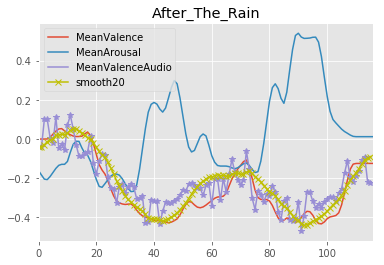

In [72]:
mov =movieNames[0]
aa = getAVprediction(mov)
dfa = getAnnotationDf(mov)
smooth10 = holt_winters_second_order_ewma( df2mat(aa[['MeanValenceAudio']]), 10, 0.3 )
smooth5 = holt_winters_second_order_ewma( df2mat(aa[['MeanValenceAudio']]), 5, 0.3 )
smooth2 = aa[['MeanValenceAudio']].rolling(window=10).mean()
smooth20 = holt_winters_second_order_ewma( df2mat(aa[['MeanValenceAudio']]), 20, 0.3 )

dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
aa[['MeanValenceAudio']].plot(ax=plt.gca(), style=['*-'], title=mov)
#pd.DataFrame(smooth10,columns=['smooth10']).plot(ax=plt.gca(),style=['.-'],title=mov)
#pd.DataFrame(smooth5,columns=['smooth5']).plot(ax=plt.gca(),style=['g+-'],title=mov)
pd.DataFrame(smooth20,columns=['smooth20']).plot(ax=plt.gca(),style=['yx-'],title=mov)
#ax=plt.gca()
#plt.plot(smooth1,label='smoothing')
#plt.plot(smooth2)

In [46]:
smooth1.shape,aa.shape

((116,), (116, 4))

## Generating N-fold csv

In [30]:
visual_feat_list= ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [ ]:
pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    #PCA(n_components=800),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))


In [ ]:
%%time
import os
idev_set = {}
smoothing = True

allfold_metric=[]
folddf_dict={}
mean_metric = []

for foldi in [1,2,3,4,5]:
    trainlist, testlist=gettraintest2movielist(foldi,mov2groups)
    os.system("mkdir NfoldCV/fold"+str(foldi))
    testfolder="NfoldCV/fold"+str(foldi)+"/test/"
    trainfolder="NfoldCV/fold"+str(foldi)+"/train/"
    os.system("mkdir "+testfolder)
    os.system("mkdir "+trainfolder)
    
    ii1,mse1,prs1,pvv = trainPipe(foldi,pipe_visual_valence,'MeanValence','visual')
    ii2,mse2,prs2,pva = trainPipe(foldi,pipe_audio_valence,'MeanValence','audio')
    
    ii3,mse3,prs3,pav = trainPipe(foldi,pipe_visual_arousal,'MeanArousal','visual')
    ii4,mse4,prs4,paa = trainPipe(foldi,pipe_audio_arousal,'MeanArousal','audio')


    fold_metric=[]
    for f in testlist:
        audiodf = getAudioDf(f)
        visualdf = getAvgVisFeatListDf(f,visual_feat_list)
        annotdf = getAnnotationDf(f)
        ya = df2mat(annotdf[['MeanArousal']])
        yv = df2mat(annotdf[['MeanValence']])
        
        print(audiodf.shape,visualdf.shape)

        mlen = min(len(audiodf),len(visualdf))

        audiodf = audiodf[:mlen]
        visualdf = visualdf[:mlen]
        ya = ya[:mlen]
        yv = yv[:mlen]

        aa = paa.predict(audiodf)
        av = pav.predict(visualdf)
        
        va = pva.predict(audiodf)
        vv = pvv.predict(visualdf)
        
        if smoothing:
            aa = holt_winters_second_order_ewma( aa, 10, 0.3 )
            av = holt_winters_second_order_ewma( av, 10, 0.3 )
            va = holt_winters_second_order_ewma( va, 10, 0.3 )
            vv = holt_winters_second_order_ewma( vv, 10, 0.3 )
        
        mseaa, prsaa = getMetrics(ya,aa)
        mseav, prsav = getMetrics(ya,av)
        mseva, prsva = getMetrics(yv,va)
        msevv, prsvv = getMetrics(yv,vv)
        
        fold_metric.append([msevv, prsvv[0], mseva, prsva[0] , mseaa, prsaa[0], mseav, prsav[0] ])
        allfold_metric.append([msevv, prsvv[0], mseva, prsva[0] , mseaa, prsaa[0], mseav, prsav[0] ])

        arousal_scores = np.transpose([ aa,av ])
        arousal_scores = np.mean(arousal_scores,axis=1)
        valence_scores = np.transpose([va,vv ])
        valence_scores = np.mean(valence_scores,axis=1)
        
        meandf = pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])

        mseA, prsA= getMetrics(ya,arousal_scores)
        mseV, prsV = getMetrics(yv,valence_scores)
        
        mean_metric.append([mseV, prsV, mseA, prsA])

        
        df =pd.DataFrame(np.transpose([va, vv , aa, av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])
        idev_set[f] = df
        filename=testfolder+str(foldi)+"_"+f+".csv"
        df.to_csv(filename, index=False)
    
    
    folddf = pd.DataFrame(fold_metric, columns=['MeanValenceAudioMSE','MeanValenceAudioPCC',
                                       'MeanValenceVisualMSE','MeanValenceVisualPCC',
                                       'MeanArousalAudioMSE','MeanArousalAudioPCC',
                                       'MeanArousalVisualMSE','MeanArousalVisualPCC'])
    
    folddf.to_csv(testfolder+str(foldi)+"_metrics.csv") 
    folddf.describe().to_csv(testfolder+str(foldi)+"_metrics_stats.csv") 
    folddf_dict[foldi] = folddf
    
    #########################################ATTENTION ###############################
    for f in ['Decay']: #trainlist:
        audiodf = getAudioDf(f)
        visualdf = getAvgVisFeatListDf(f,visual_feat_list)
        #print(audiodf.shape,visualdf.shape)

        mlen = min(len(audiodf),len(visualdf))

        audiodf = audiodf[:mlen]
        visualdf = visualdf[:mlen]

        aa = paa.predict(audiodf)
        av = pav.predict(visualdf)
        
        va = pvv.predict(audiodf)
        vv = pva.predict(visualdf)

        if smoothing:
            aa = holt_winters_second_order_ewma( aa, 10, 0.3 )
            av = holt_winters_second_order_ewma( av, 10, 0.3 )
            va = holt_winters_second_order_ewma( va, 10, 0.3 )
            vv = holt_winters_second_order_ewma( vv, 10, 0.3 )

        df =pd.DataFrame(np.transpose([ vv,va ,aa,av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])
        idev_set[f] = df
        filename=trainfolder+str(foldi)+"_"+f+".csv"
        #df.to_csv(filename, index=False)
        
    
allfolddf = pd.DataFrame(allfold_metric, columns=['MeanValenceAudioMSE','MeanValenceAudioPCC',
                                       'MeanValenceVisualMSE','MeanValenceVisualPCC',
                                       'MeanArousalAudioMSE','MeanArousalAudioPCC',
                                       'MeanArousalVisualMSE','MeanArousalVisualPCC'])
    
allfolddf.to_csv("all_metrics.csv") 
allfolddf.describe().to_csv("all_metrics_stats.csv")    
mean_metricdf=pd.DataFrame(mean_metric,columns=['mseV, prsV, mseA, prsA'])


## Test-set RUN

In [52]:
%%time
fname = 'xxme17ei_BOUNNKU_valence_arousal_p.txt'
fd = open(fname, 'w')
fd.close()

def getAVmeanscore(aa,av,va,vv):
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df = pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    
    return df


def getAVTestprediction(f):
    
    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = paa.predict(audiodf)
    av = pav.predict(visualdf)
        
    va = pvv.predict(audiodf)
    vv = pva.predict(visualdf)

    df = pd.DataFrame(np.transpose([vv, va , aa, av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])
     
    meandf = getAVmeanscore(aa,av,va,vv)
    
    return df

os.system("mkdir ./Test-Prediction")

for f in testmovieNames:
    print(f)
    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = paa.predict(audiodf)
    av = pav.predict(visualdf)
        
    va = pvv.predict(audiodf)
    vv = pva.predict(visualdf)

    df = pd.DataFrame(np.transpose([vv, va , aa, av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])
     
    meandf = getAVmeanscore(aa,av,va,vv)
      
    #scoresdf , meanddf = getAVTestprediction(f) 
    sfilename="./Test-Prediction/"+f+".csv"
    df.to_csv(sfilename, index=False)
    
    #df.to_csv(fname, sep=' ', index=False, header=False,float_format='%.5f' mode='a')
    ##data.reset_index().to_csv('foo.csv', index=False, header=True, decimal=',', sep=' ', float_format='%.3f')

MEDIAEVAL17_00
(702, 1583) (702, 1271)
MEDIAEVAL17_01
(167, 1583) (168, 1271)
MEDIAEVAL17_02
(943, 1583) (943, 1271)
MEDIAEVAL17_03
(1091, 1583) (1091, 1271)
MEDIAEVAL17_04
(151, 1583) (151, 1271)
MEDIAEVAL17_05
(1251, 1583) (1251, 1271)
MEDIAEVAL17_06
(1117, 1583) (1117, 1271)
MEDIAEVAL17_07
(41, 1583) (41, 1271)
MEDIAEVAL17_08
(40, 1583) (41, 1271)
MEDIAEVAL17_09
(41, 1583) (41, 1271)
MEDIAEVAL17_10
(41, 1583) (41, 1271)
MEDIAEVAL17_11
(41, 1583) (41, 1271)
MEDIAEVAL17_12
(41, 1583) (41, 1271)
MEDIAEVAL17_13
(41, 1583) (41, 1271)
CPU times: user 2min 34s, sys: 2.81 s, total: 2min 36s
Wall time: 2min 36s


In [66]:

#test
f = "Wanted"
audiodf = getAudioDf(f)
visualdf = getAvgVisFeatListDf(f,visual_feat_list)
print(audiodf.shape,visualdf.shape)

mlen = min(len(audiodf),len(visualdf))

audiodf = audiodf[:mlen]
visualdf = visualdf[:mlen]

aa = paa.predict(audiodf)
av = pav.predict(visualdf)
arousal_scores = np.transpose([ aa,av ])
        

va = pvv.predict(audiodf)  ## look up this is twisted
vv = pva.predict(visualdf)
valence_scores = np.transpose([va,vv ])
        
df =pd.DataFrame(np.transpose([ aa,av , va,vv ])) #, columns=['MeanValence','MeanArousal'])


(22, 1583) (22, 1271)


In [166]:
#pd.DataFrame(results,columns=['test-group','MSE','PCC'])
pipe1scores = crossgroups(pipe_visual_valence,'MeanValence','visual')
pipe1scores

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
Train score: 0.94
Train score: 0.95
Train score: 0.95
Train score: 0.95
Train score: 0.95
Train score: 0.95
Train score: 0.95
Test score: -0.46
Test score: -1.70
Test score: -0.27
Test score: -0.46
Test score: -0.79
Test score: -0.58
Test score: -0.46
MSE score: 0.14852
Pearson score:
(0.0062357629957094643, 0.86679496607230866)
MSE score: 

test-group       MSE       PCC
0           0  0.135345 -0.088656
1           1  0.103613  0.296140
2           2  0.192597  0.364418
3           3  0.148517  0.006236
4           4  0.167325 -0.121752
5           5  0.078887  0.134925
6           6  0.207572  0.355358

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Xa_train.shape, Xa_test.shape, ya_train.shape, ya_test.shape)
print(tXv.shape,tXa.shape,ty.shape)
print(testXv.shape, testXa.shape, testy.shape)

(3644, 1271) (912, 1271) (3644, 2) (912, 2)
(3644, 1583) (912, 1583) (3644, 2) (912, 2)
(4556, 1271) (4556, 1583) (4556, 2)
(708, 1271) (708, 1583) (708, 2)


In [43]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#tXv.shape,tXa.shape,ty.shape
#testXv.shape, testXa.shape, testy.shape

pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

#SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
#  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
#  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#X_train, X_test, y_train, y_test 
y_pred_visV_train,mse,prs,pipe_vv = evaluate_pipe(pipe_visual_valence, 
                                   X_train,y_train[['MeanValence']], 
                                   X_test,  y_test[['MeanValence']])
#y_pred_vis,mse,prs = evaluate_pipe(pipe_visual_valence,tXv,ytrain,testXv,ytest)

y_pred_visV_test,mse,prs,pipe_vv = evaluate_pipe(pipe_visual_valence, 
                                   tXv,ty[['MeanValence']], 
                                   testXv, testy[['MeanValence']])



Train score: 0.94
Test score: 0.81
MSE score: 0.02165
Pearson score:
(0.90344469546466666, 0.0)
Train score: 0.95
Test score: -0.79
MSE score: 0.19260
Pearson score:
(0.36441773046669984, 1.1692814368608515e-23)
CPU times: user 1min 9s, sys: 4 ms, total: 1min 9s
Wall time: 1min 9s


In [ ]:
#pipe_visual_valence_scores

In [ ]:
#sorted(pipe_visual_valence_scores.MSE),sorted(pipe_visual_valence_scores.PCC)

## Grid-Search on Audio features - Valence

In [48]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 

#pipe = Pipeline([('preprocessing', StandardScaler()),('reduce_dim', PCA(n_components=600)) ,('classifier', SVR())])
pipe = Pipeline([('preprocessing', StandardScaler()),('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 
     'preprocessing': [StandardScaler()],
     #'reduce_dim__n_components' : [ 50, 100, 500 ,750],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400],
     'classifier__max_features': [3,5,10]}
]

grid_audio_valence = GridSearchCV(pipe, param_grid, cv=5,n_jobs=-1)
ytrainarray = ya_train[['MeanValence']].as_matrix()
ytrainarray = ytrainarray.reshape((len(ya_train),))
grid_audio_valence.fit(Xa_train,ytrainarray)

print("Best params:\n{}\n".format(grid_audio_valence.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audio_valence.best_score_))
print("All grid scores")

grid_audio_valence.grid_scores_, grid_audio_valence.best_params_, grid_audio_valence.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.53
All grid scores
CPU times: user 1min 44s, sys: 11.5 s, total: 1min 55s
Wall time: 2min 45s


In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Xa_train.shape, Xa_test.shape, ya_train.shape, ya_test.shape)
print(tXv.shape,tXa.shape,ty.shape)
print(testXv.shape, testXa.shape, testy.shape)

(2477, 1271) (1167, 1271) (2477, 2) (1167, 2)
(2915, 1583) (729, 1583) (2915, 2) (729, 2)
(3644, 1271) (3644, 1583) (3644, 2)
(708, 1271) (708, 1583) (708, 2)


In [49]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)

#    SVR(C=10, cache_size=200, coef0=0.0, degree=3, 
#       epsilon=0.1, gamma=0.001,
#      kernel='rbf', max_iter=-1, 
#     shrinking=True, tol=0.001, verbose=False)


#Xa_train, Xa_test, ya_train, ya_test 
y_pred_audV_train,mse,prs,pipe_va = evaluate_pipe(pipe_audio_valence, 
                                   Xa_train,ya_train[['MeanValence']], 
                                   Xa_test,ya_test[['MeanValence']])

y_pred_audV_test,mse,prs,pipe_va = evaluate_pipe(pipe_audio_valence, 
                                   tXa,ty[['MeanValence']], 
                                   testXa,testy[['MeanValence']])



Train score: 0.93
Test score: 0.56
MSE score: 0.05061
Pearson score:
(0.76498279389571466, 4.5245244239857375e-176)
Train score: 0.93
Test score: -0.19
MSE score: 0.12872
Pearson score:
(0.22000713384401305, 3.2925748548172267e-09)
CPU times: user 2min 9s, sys: 24 ms, total: 2min 9s
Wall time: 2min 9s


In [68]:
pipe2scores = crossgroups(pipe_audio_valence,'MeanValence','audio')

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
Train score: 0.92
Train score: 0.94
Train score: 0.94
Train score: 0.93
Train score: 0.94
Test score: -1.85
Train score: 0.93
Train score: 0.94
Test score: -0.52
Test score: -0.19
Test score: -0.19
Test score: 0.08
Test score: 0.06
Test score: -0.09
MSE score: 0.21949
Pearson score:
(0.22803118653596122, 3.1928865845418501e-12)
MSE score: 0

In [69]:
pipe2scores


test-group       MSE       PCC
0           0  0.078894  0.323093
1           1  0.107623  0.066597
2           2  0.128717  0.220007
3           3  0.121412  0.045289
4           4  0.124347  0.356526
5           5  0.059194  0.241319
6           6  0.219488  0.228031

In [70]:
pipe1scores

test-group       MSE       PCC
0           0  0.135345 -0.088656
1           1  0.103613  0.296140
2           2  0.192597  0.364418
3           3  0.148517  0.006236
4           4  0.167325 -0.121752
5           5  0.078887  0.134925
6           6  0.207572  0.355358

In [149]:
y_pred_visV_train.shape,y_test.shape, y_pred_visV_test.shape,testy.shape

((1453,), (1453, 2), (726,), (726, 2))

In [151]:
y_pred_audV_train.shape,ya_test.shape, y_pred_audV_test.shape,testy.shape

((908,), (908, 2), (726,), (726, 2))

In [ ]:
y_val_vitrain = pipe_visual_valence.fit(tXv,df2mat(ty[['MeanValence']])).predict(tXv)
y_val_autrain = pipe_audio_valence.fit(tXa,df2mat(ty[['MeanValence']])).predict(tXa)

train_val = np.transpose([y_val_vitrain,y_val_autrain])
train_val_y = df2mat(ty[['MeanValence']])

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()],
     'classifier__kernel':['linear','rbf'],
     'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [ 1, 10, 100]}
]

grid_valence_fuse = GridSearchCV(pipe, param_grid, cv=5,n_jobs=100)
grid_valence_fuse.fit(train_val,train_val_y)

print("Best params:\n{}\n".format(grid_valence_fuse.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_valence_fuse.best_score_))
print("All grid scores")


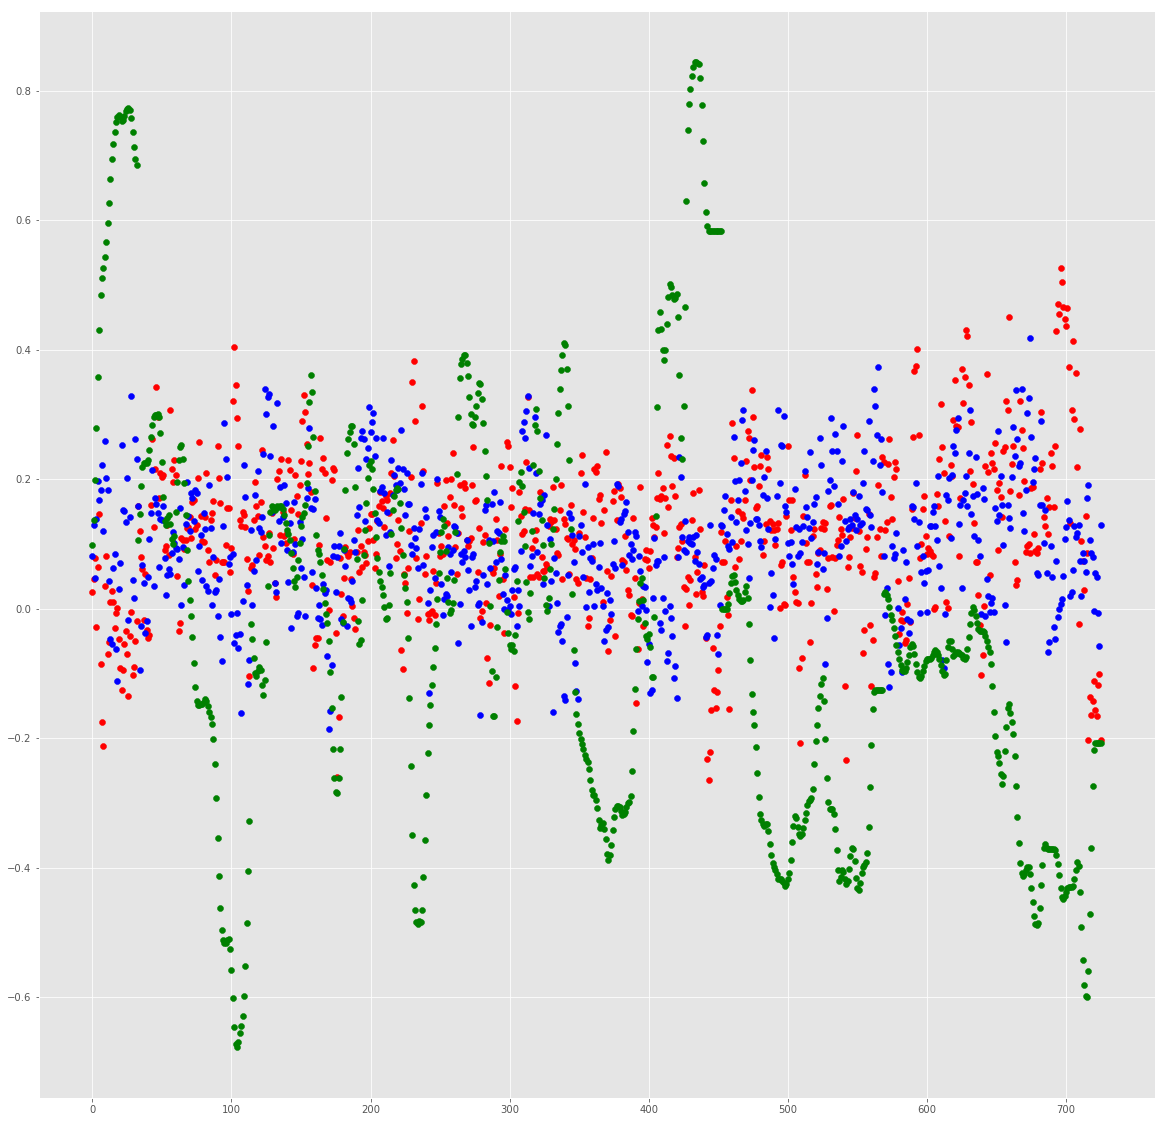

In [142]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_vis,c='r')
plt.scatter(range(len(testy)),y_pred_aud,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanValence']]),c='g')


## Grid Search on Visual Features -Arousal

In [ ]:
%%time
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400, 600, 1000],
     'classifier__max_features': [3,5,10,15,20]}
]

grid_vis_arousal = GridSearchCV(pipe, param_grid, cv=5,n_jobs=120)
ytrainarray = y_train[['MeanArousal']].as_matrix()
ytrainarray = ytrainarray.reshape((len(y_train),))
grid_vis_arousal.fit(X_train,ytrainarray)



In [72]:
print("Best params:\n{}\n".format(grid_vis_arousal.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_vis_arousal.best_score_))
grid_vis_arousal.grid_scores_, grid_vis_arousal.best_params_, grid_vis_arousal.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.74


([mean: 0.06156, std: 0.00958, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00101, std: 0.00637, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00935, std: 0.00589, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.009

In [73]:
grid_vis_arousal.best_params_

{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [74]:
grid_vis_arousal.best_score_

0.7385727011014819

In [75]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#tXv.shape,tXa.shape,ty.shape
#testXv.shape, testXa.shape, testy.shape

pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

#X_train, X_test, y_train, y_test 
y_pred_visA_train,mse,prs,pipe_av = evaluate_pipe(pipe_visual_arousal, 
                                   X_train,y_train[['MeanArousal']], 
                                   X_test,  y_test[['MeanArousal']])

y_pred_visA_test,mse,prs,pipe_av = evaluate_pipe(pipe_visual_arousal, 
                                   tXv,ty[['MeanArousal']], 
                                   testXv, testy[['MeanArousal']])


Train score: 0.92
Test score: 0.78
MSE score: 0.01907
Pearson score:
(0.88831506127409721, 8.414561858120353e-310)
Train score: 0.92
Test score: -0.28
MSE score: 0.11210
Pearson score:
(0.11492042888053544, 0.0021943582863590029)
CPU times: user 1min 8s, sys: 48 ms, total: 1min 8s
Wall time: 1min 8s


In [148]:
y_pred_visA_train.shape,y_test.shape, y_pred_visA_test.shape,testy.shape

((1453,), (1453, 2), (726,), (726, 2))

In [76]:
pipe3scores = crossgroups(pipe_visual_arousal,'MeanArousal','visual')

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
Train score: 0.91
Train score: 0.93
Train score: 0.93
Test score: 0.10
Train score: 0.93
Train score: 0.93
Train score: 0.92
Train score: 0.93
Test score: -0.53
Test score: -0.23
MSE score: 0.11514
Pearson score:
(0.37904846653261204, 1.551505325235092e-32)
Test score: -0.20
Test score: -0.12
Test score: -0.28
MSE score: 0.08356
Pearson sco

In [77]:
pipe3scores

test-group       MSE       PCC
0           0  0.053787  0.224167
1           1  0.087400  0.275252
2           2  0.112104  0.114920
3           3  0.083560  0.001598
4           4  0.079956  0.073692
5           5  0.058802  0.189082
6           6  0.115136  0.379048

## Grid Search on Audio Features -Arousal

In [78]:
%%time
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400, 600, 1000],
     'classifier__max_features': [3,5,10,15,20]}
]

grid_audio_arousal = GridSearchCV(pipe, param_grid, cv=5,n_jobs=220)
ytrainarray = ya_train[['MeanArousal']].as_matrix()
ytrainarray = ytrainarray.reshape((len(ya_train),))
grid_audio_arousal.fit(Xa_train,ytrainarray)



CPU times: user 2min 37s, sys: 26.6 s, total: 3min 3s
Wall time: 4min 2s


In [79]:
print("Best params:\n{}\n".format(grid_audio_arousal.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audio_arousal.best_score_))
grid_audio_arousal.grid_scores_, grid_audio_arousal.best_params_, grid_audio_arousal.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.46


([mean: 0.01696, std: 0.00651, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00948, std: 0.00590, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00949, std: 0.00590, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.009

In [80]:
grid_audio_arousal.best_score_

0.45895912404912326

In [148]:
X_train.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270],
           dtype='int64', length=1271)

In [81]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),  
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)
y_pred_audA_train,mse,prs,pipe_aa = evaluate_pipe(pipe_audio_arousal, 
                                   Xa_train,ya_train[['MeanArousal']], 
                                   Xa_test,ya_test[['MeanArousal']])

y_pred_audA_test,mse,prs,pipe_aa = evaluate_pipe(pipe_audio_arousal, 
                                   tXa,ty[['MeanArousal']], 
                                   testXa,testy[['MeanArousal']])



Train score: 0.90
Test score: 0.46
MSE score: 0.04632
Pearson score:
(0.69802308700538951, 3.8932885202799436e-134)
Train score: 0.90
Test score: -0.24
MSE score: 0.10834
Pearson score:
(-0.0047055387115798692, 0.90053487320266001)
CPU times: user 2min 5s, sys: 44 ms, total: 2min 5s
Wall time: 2min 5s


In [93]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    #PCA(n_components=800),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)
y_pred_audA_train,mse,prs,pipe_aa2 = evaluate_pipe(pipe_audio_arousal, 
                                   Xa_train,ya_train[['MeanArousal']], 
                                   Xa_test,ya_test[['MeanArousal']])

y_pred_audA_test,mse,prs,pipe_aa2 = evaluate_pipe(pipe_audio_arousal, 
                                   tXa,ty[['MeanArousal']], 
                                   testXa,testy[['MeanArousal']])



Train score: 0.53
Test score: 0.29
MSE score: 0.05177
Pearson score:
(0.55740224174159003, 2.9797826919266122e-72)
Train score: 0.58
Test score: -0.17
MSE score: 0.15030
Pearson score:
(0.029656273283452401, 0.37101791611056034)
CPU times: user 23min 18s, sys: 11.9 s, total: 23min 30s
Wall time: 1min 13s


In [82]:
pipe4scores = crossgroups(pipe_audio_arousal,'MeanArousal','audio')

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
Train score: 0.89
Train score: 0.91
Train score: 0.91
Test score: -0.11
Train score: 0.90
Train score: 0.91
Train score: 0.91
Train score: 0.91
Test score: 0.10
Test score: -0.11
Test score: -0.24
Test score: -0.35
Test score: -0.24
MSE score: 0.14148
Pearson score:
(0.11365776381857078, 0.0005842325174730469)
Test score: 0.02
MSE score: 0.

In [141]:
pipe4scores

test-group       MSE       PCC
0           0  0.053187  0.190283
1           1  0.063860  0.479557
2           2  0.108337 -0.004706
3           3  0.073607  0.067498
4           4  0.071342  0.248574
5           5  0.060822  0.038884
6           6  0.141478  0.113658

In [83]:
y_pred_visA_train.shape,y_test.shape, y_pred_visA_test.shape,testy.shape

((912,), (912, 2), (708,), (708, 2))

In [84]:
y_pred_audA_train.shape,ya_test.shape, y_pred_audA_test.shape,testy.shape

((912,), (912, 2), (708,), (708, 2))

In [93]:
y_pred_meanV = np.mean(np.transpose([y_pred_visV_test,y_pred_audV_test]),axis=1)

In [154]:
pipe11=pipe_visual_valence
pipe22=pipe_audio_valence
pipe33=pipe_visual_arousal
pipe44=pipe_audio_arousal

In [ ]:
allXv,allXa,allXd,ally = getFeatureswAnnotationsDf(movieNames)



In [155]:
print(allXv.shape,allXa.shape,allXd.shape,ally.shape)

(5264, 1271) (5264, 1583) (5264, 4096) (5264, 2)


In [158]:
allXv_train, allXv_test, ally_train, ally_test = train_test_split(allXv, ally,test_size=0.2, random_state=0)
allXa_train, allXa_test, allya_train, allya_test = train_test_split(allXa, ally,test_size=0.2, random_state=0)
allXd_train, allXd_test, allyd_train, allyd_test = train_test_split(allXd, ally,test_size=0.2, random_state=0)


In [167]:
%%time
y_pred_aa_test,mse,prs,pipe4aa = evaluate_pipe(pipe_audio_arousal, 
                                   allXa_train,allya_train[['MeanArousal']], 
                                   testXa,testy[['MeanArousal']])



Train score: 0.91
Test score: 0.82
MSE score: 0.01587
Pearson score:
(0.92753393643222781, 5.536189849578476e-304)
CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 6s


In [168]:
%%time
y_pred_av_test,mse,prs,pipe3av = evaluate_pipe(pipe_visual_arousal, 
                                   allXv_train,ally_train[['MeanArousal']], 
                                   testXv,testy[['MeanArousal']])



Train score: 0.92
Test score: 0.89
MSE score: 0.00994
Pearson score:
(0.95159716522684401, 0.0)
CPU times: user 37.8 s, sys: 0 ns, total: 37.8 s
Wall time: 37.8 s


In [169]:
y_pred_va_test,mse,prs,pipe2va = evaluate_pipe(pipe_audio_valence, 
                                   allXa_train,allya_train[['MeanValence']], 
                                   testXa,testy[['MeanValence']])
y_pred_vv_test,mse,prs,pipe1vv = evaluate_pipe(pipe_visual_valence, 
                                   allXv_train,ally_train[['MeanValence']], 
                                   testXv,testy[['MeanValence']])


Train score: 0.93
Test score: 0.82
MSE score: 0.01979
Pearson score:
(0.92341254627481562, 7.8903979285267218e-296)
Train score: 0.95
Test score: 0.91
MSE score: 0.01010
Pearson score:
(0.95710678124440263, 0.0)


In [170]:
pipe4scores.sort_values('PCC')

test-group       MSE       PCC
2           2  0.108337 -0.004706
5           5  0.060822  0.038884
3           3  0.073607  0.067498
6           6  0.141478  0.113658
0           0  0.053187  0.190283
4           4  0.071342  0.248574
1           1  0.063860  0.479557

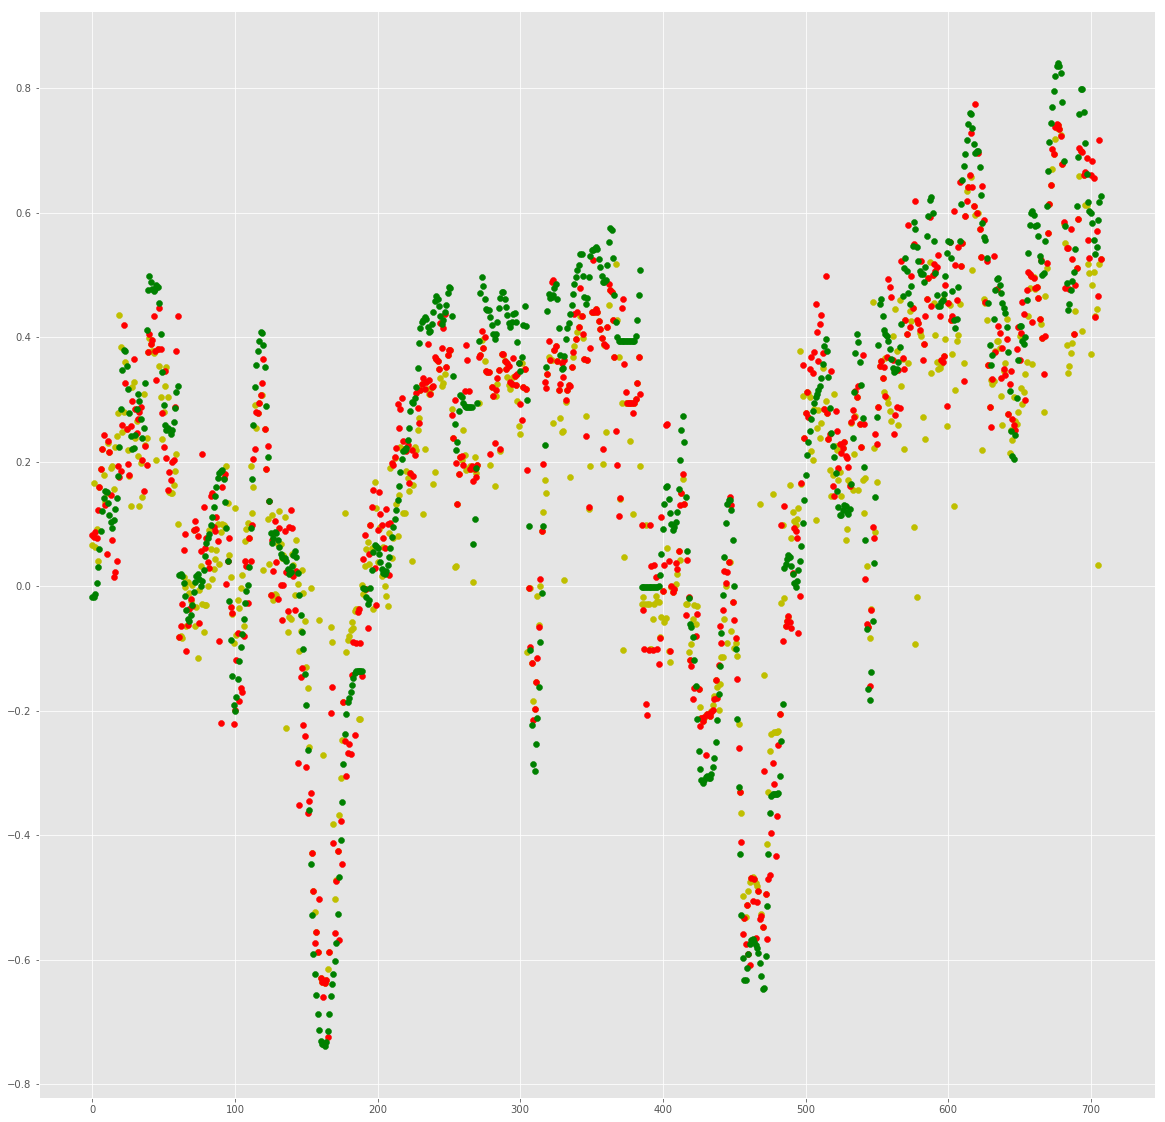

In [171]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_va_test,c='y')
plt.scatter(range(len(testy)),y_pred_vv_test,c='r')
plt.scatter(range(len(testy)),df2mat(testy[['MeanValence']]),c='g')


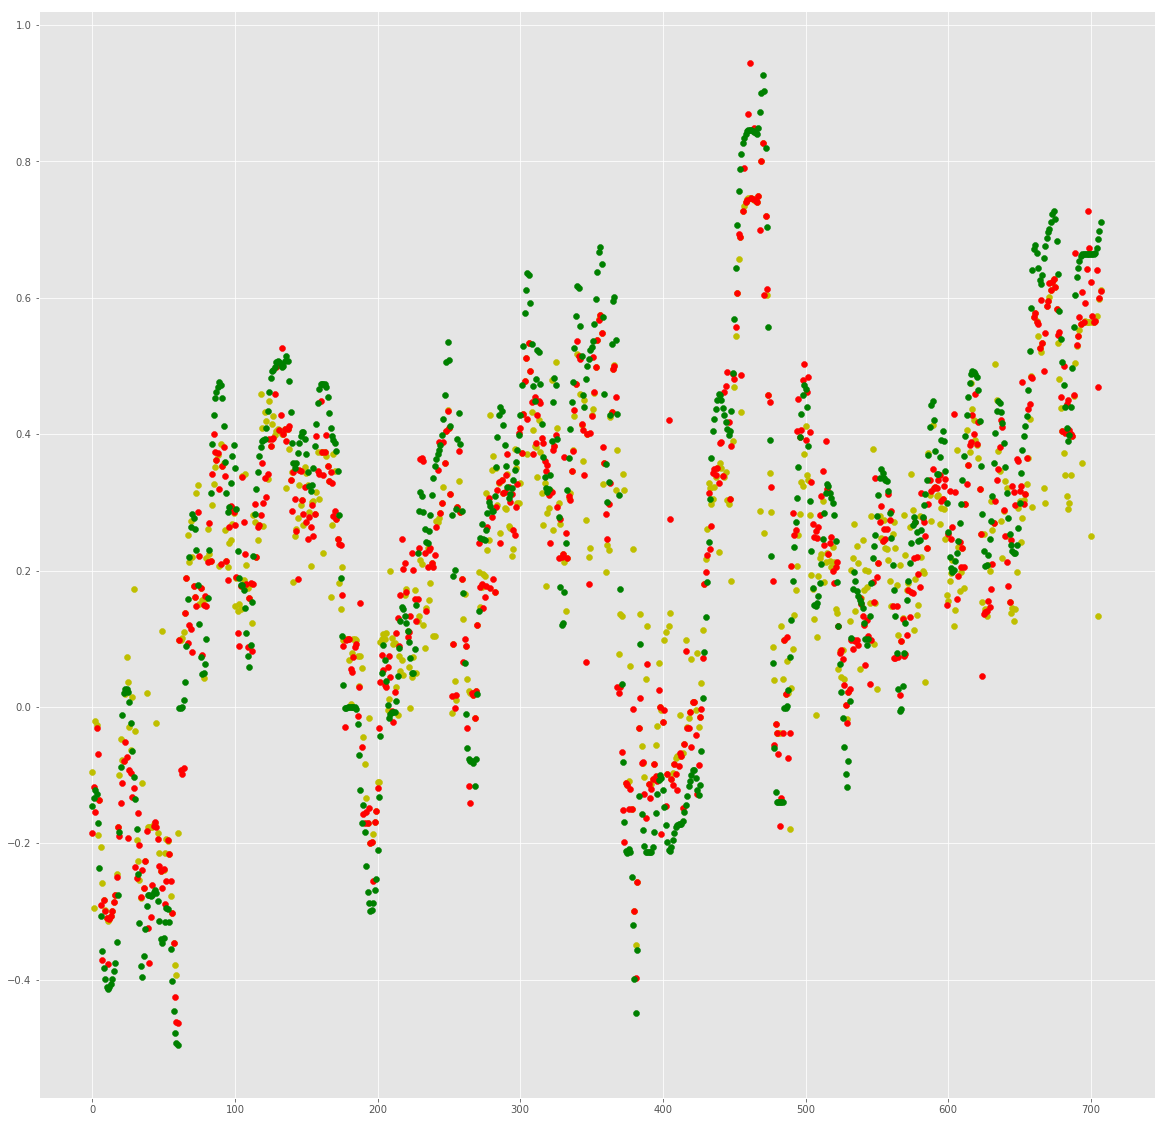

In [172]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_aa_test,c='y')
plt.scatter(range(len(testy)),y_pred_av_test,c='r')
plt.scatter(range(len(testy)),df2mat(testy[['MeanArousal']]),c='g')


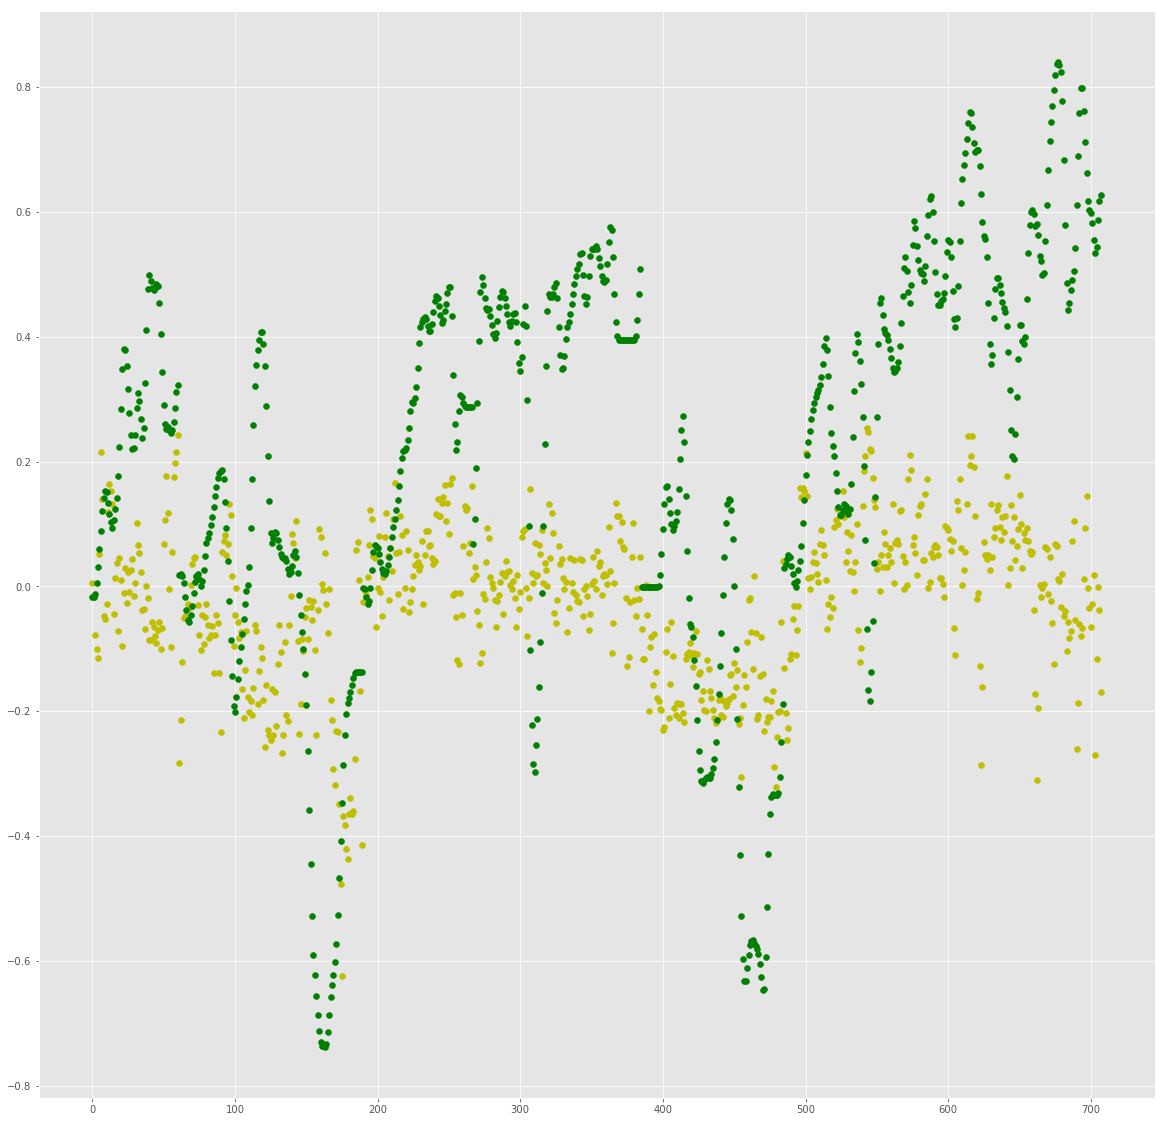

In [94]:
plt.figure(figsize=(20,20))
#plt.scatter(range(len(testy)),y_pred_meanV,c='y')
#plt.scatter(range(len(testy)),y_pred_visV_test,c='r')
#plt.scatter(range(len(testy)),y_pred_audV_test,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanValence']]),c='g')


In [95]:
y_pred_meanA = np.mean(np.transpose([y_pred_visA_test,y_pred_audA_test]),axis=1)

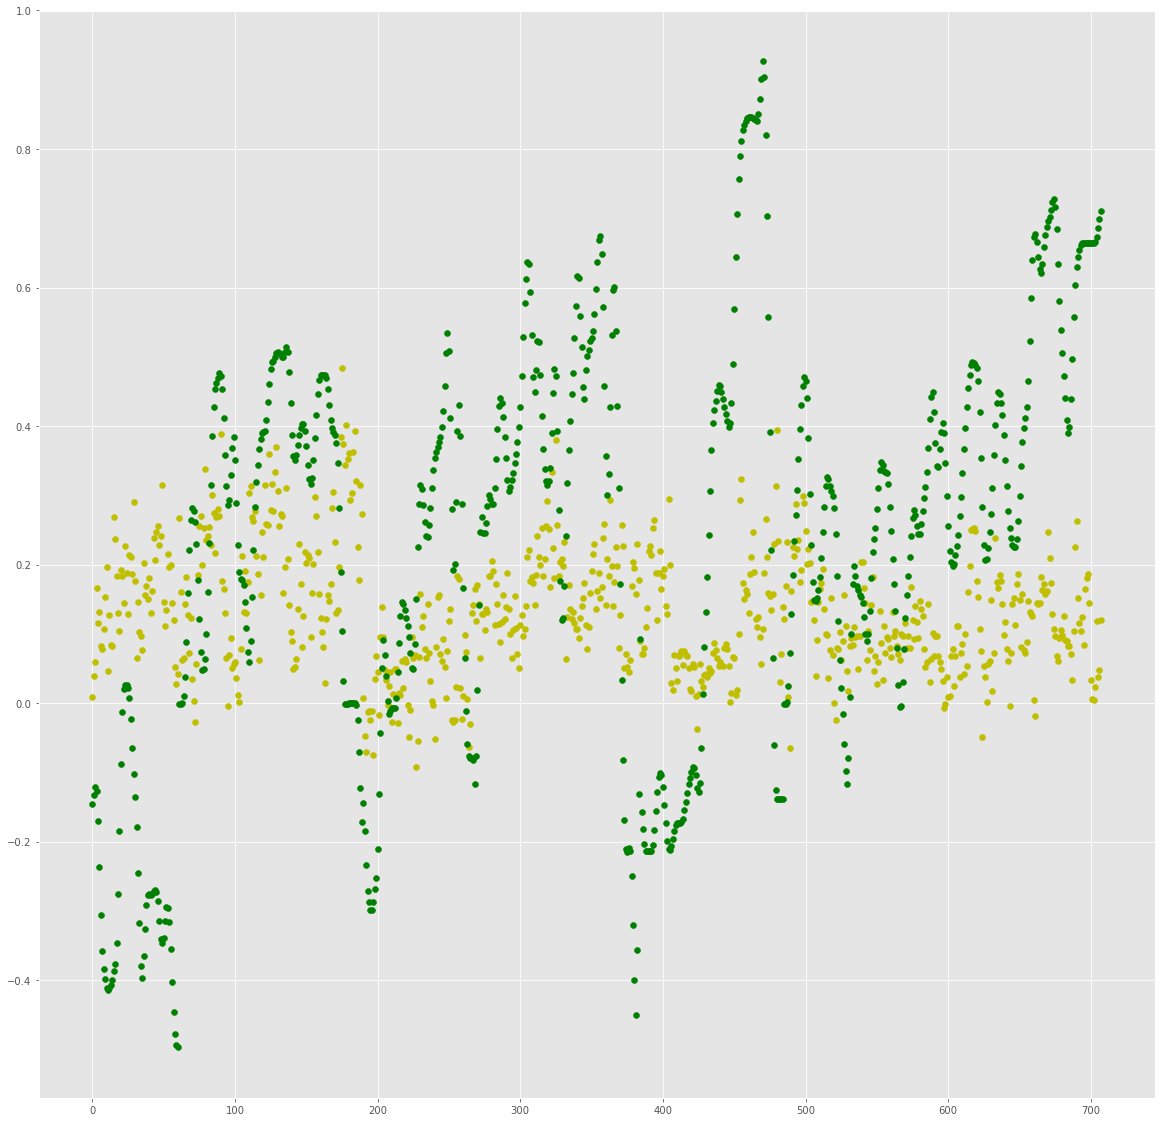

In [96]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_meanA,c='y')
#plt.scatter(range(len(testy)),y_pred_visA_test,c='r')
#plt.scatter(range(len(testy)),y_pred_audA_test,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanArousal']]),c='g')


# Test Run 1

In [190]:
print(pipe_audio_arousal, 
pipe_visual_arousal, 
pipe_audio_valence, 
pipe_visual_valence)


Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]) Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]) Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]) Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])


In [101]:
visual_feat_list= ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [187]:
%%time
#pipe4aa
#pipe3av
#pipe2va
#pipe1vv
fname = 'me17ei_BOUNNKU_valence_arousal_1_run2.txt'
fd = open(fname, 'w')
fd.close()

test_set = {}
for f in testmovieNames:
    print(f)
    
    fd = open(fname, 'a')
    fd.write(f+'\n')  # python will convert \n to os.linesep
    fd.close()
    
    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = pipe4aa.predict(audiodf)
    av = pipe3av.predict(visualdf)
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    
    va = pipe2va.predict(audiodf)
    vv = pipe1vv.predict(visualdf)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    df.to_csv(fname, sep=' ', index=False, header=False, mode='a')
    test_set[f] = df
    

MEDIAEVAL17_00
(702, 1583) (702, 1271)
MEDIAEVAL17_01
(167, 1583) (168, 1271)
MEDIAEVAL17_02
(943, 1583) (943, 1271)
MEDIAEVAL17_03
(1091, 1583) (1091, 1271)
MEDIAEVAL17_04
(151, 1583) (151, 1271)
MEDIAEVAL17_05
(1251, 1583) (1251, 1271)
MEDIAEVAL17_06
(1117, 1583) (1117, 1271)
MEDIAEVAL17_07
(41, 1583) (41, 1271)
MEDIAEVAL17_08
(40, 1583) (41, 1271)
MEDIAEVAL17_09
(41, 1583) (41, 1271)
MEDIAEVAL17_10
(41, 1583) (41, 1271)
MEDIAEVAL17_11
(41, 1583) (41, 1271)
MEDIAEVAL17_12
(41, 1583) (41, 1271)
MEDIAEVAL17_13
(41, 1583) (41, 1271)
CPU times: user 2min 50s, sys: 2.54 s, total: 2min 53s
Wall time: 2min 53s


In [184]:
# ploting results on dev-
dev_set = {}
for f in movieNames:
    audiodf = getAudioDf(f)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = pipe4aa.predict(audiodf)
    av = pipe3av.predict(visualdf)
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    
    va = pipe2va.predict(audiodf)
    vv = pipe1vv.predict(visualdf)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    dev_set[f] = df


(116, 1583) (117, 1271)
(273, 1583) (273, 1271)
(196, 1583) (196, 1271)
(176, 1583) (176, 1271)
(118, 1583) (118, 1271)
(100, 1583) (101, 1271)
(139, 1583) (139, 1271)
(201, 1583) (202, 1271)
(912, 1583) (912, 1271)
(129, 1583) (129, 1271)
(127, 1583) (127, 1271)
(223, 1583) (223, 1271)
(33, 1583) (33, 1271)
(154, 1583) (154, 1271)
(77, 1583) (77, 1271)
(339, 1583) (339, 1271)
(61, 1583) (61, 1271)
(99, 1583) (99, 1271)
(157, 1583) (157, 1271)
(214, 1583) (214, 1271)
(179, 1583) (179, 1271)
(176, 1583) (176, 1271)
(184, 1583) (185, 1271)
(227, 1583) (227, 1271)
(145, 1583) (146, 1271)
(48, 1583) (49, 1271)
(185, 1583) (185, 1271)
(81, 1583) (82, 1271)
(22, 1583) (22, 1271)
(173, 1583) (173, 1271)


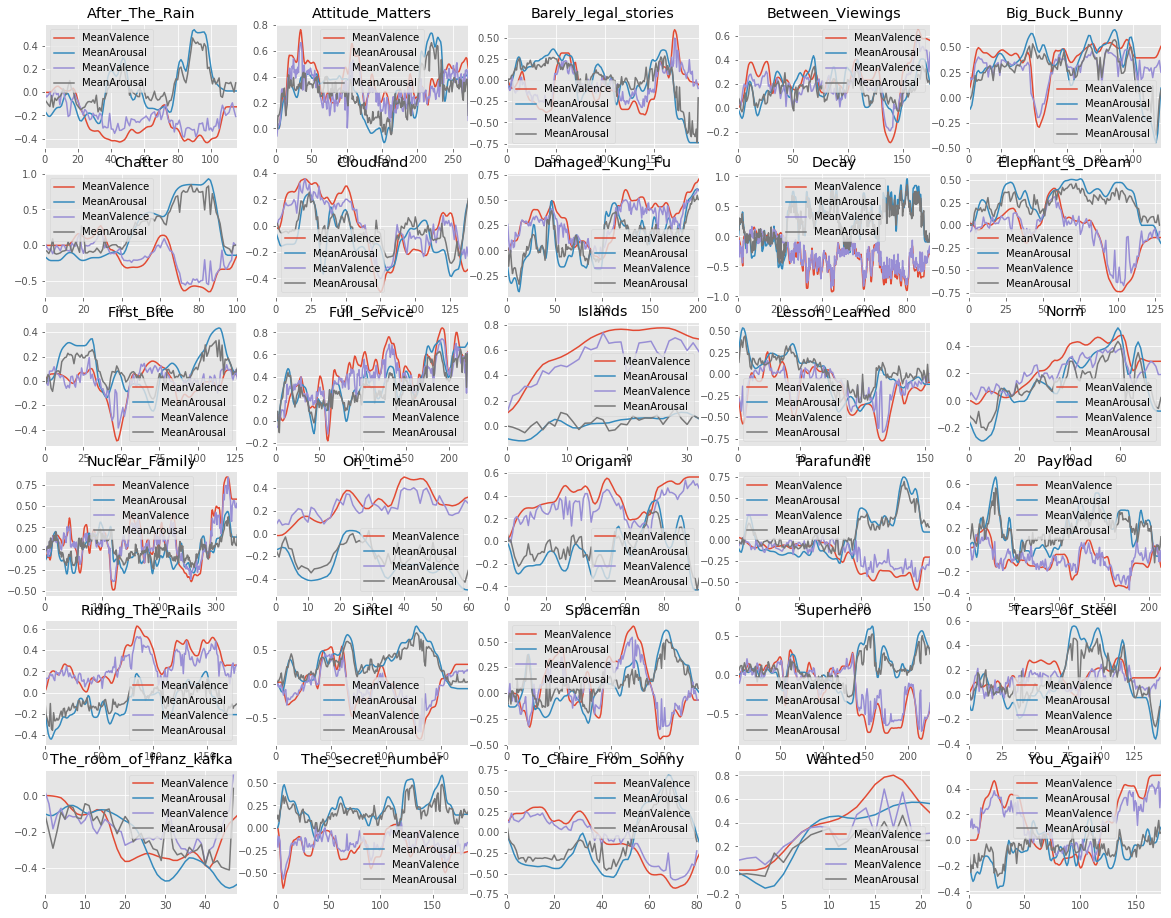

In [185]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    dfa = getAnnotationDf(mov)
    dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    dev_set[mov][['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)



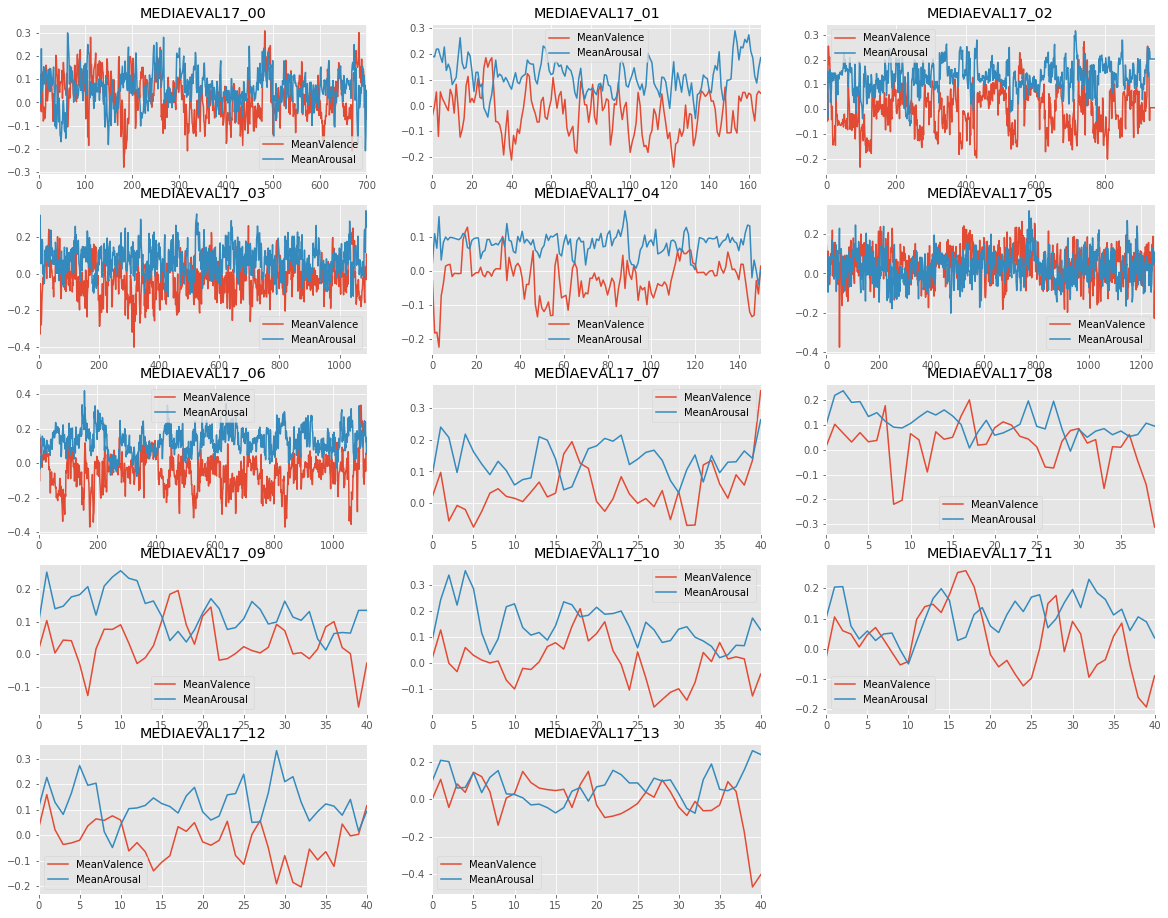

In [188]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(testmovieNames):
    plt.subplot(5,3,ii+1)
    test_set[mov][['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)



## Test 2- pipes with 2 groups

It looks like the pipe are successfully predict the movie "Decay", since it was in all the traiing sets.
however 


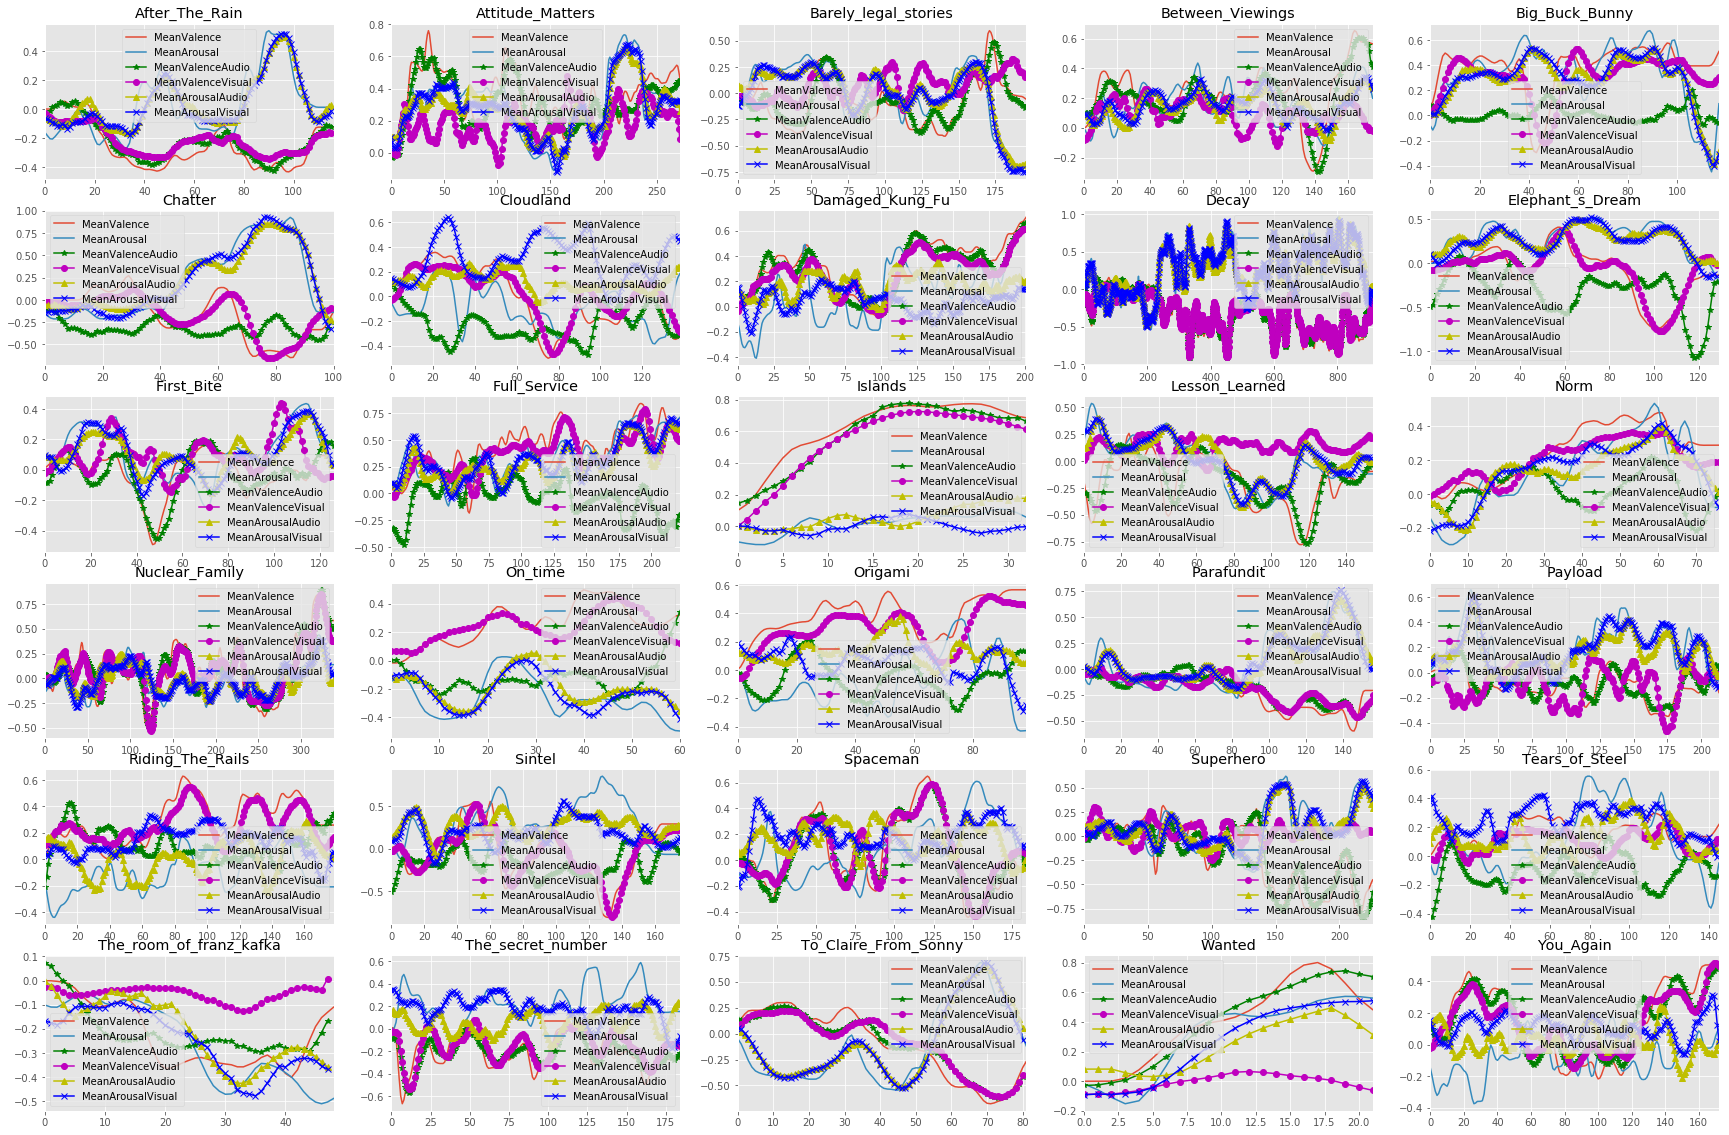

In [74]:
fix, axes = plt.subplots(figsize=(30,20))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    dfa = getAnnotationDf(mov)
    dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    idev_set[mov].plot(ax=plt.gca(),title=mov,style=['g*-','mo-','y^-','bx-'])


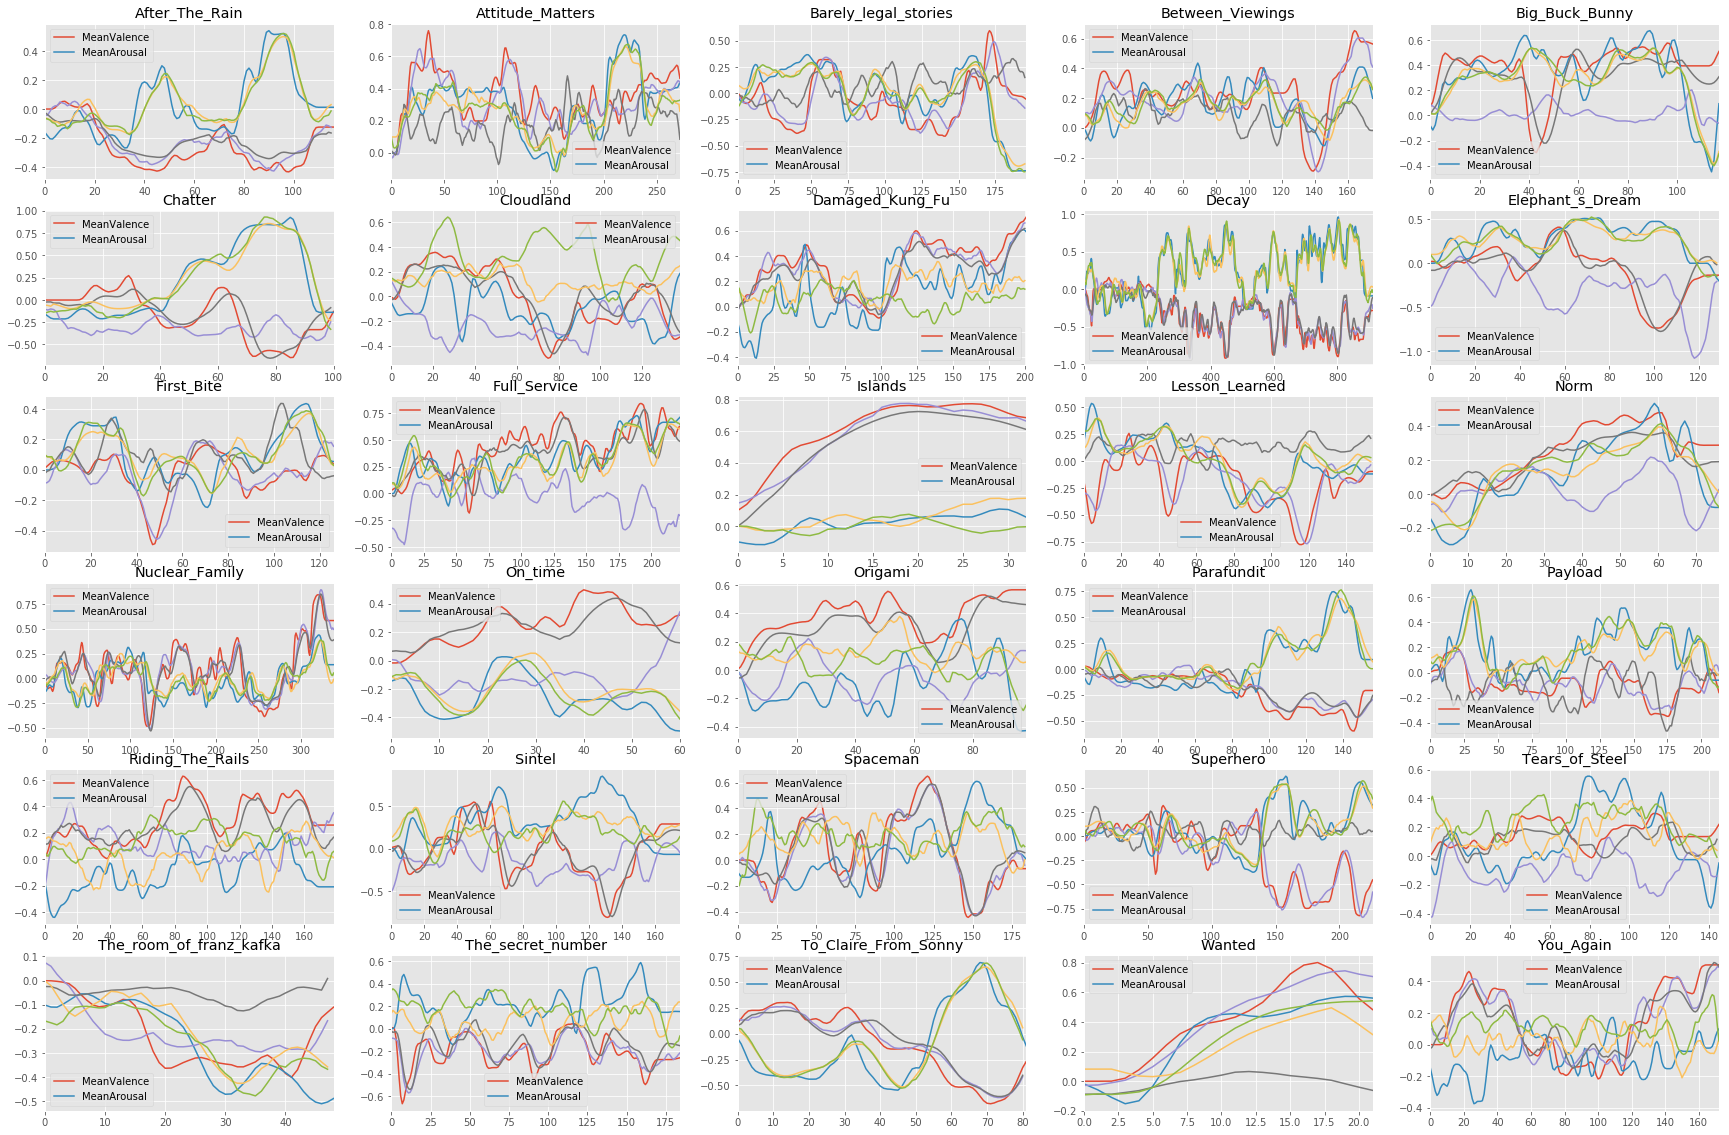

In [56]:
fix, axes = plt.subplots(figsize=(30,20))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    dfa = getAnnotationDf(mov)
    dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    idev_set[mov].plot(ax=plt.gca(),title=mov,legend=None)


## this run have some bug related to pipes 

In [138]:
%%time
fname = 'me17ei_BOUNNKU_valence_arousal_1.txt'
fd = open(fname, 'w')
fd.close()

for f in testmovieNames:
    print(f)
    
    fd = open(fname, 'a')
    fd.write(f+'\n')  # python will convert \n to os.linesep
    fd.close()
    
    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = pipe_audio_arousal.predict(audiodf)
    av = pipe_visual_arousal.predict(visualdf)
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    
    va = pipe_audio_valence.predict(audiodf)
    vv = pipe_visual_valence.predict(visualdf)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    df.to_csv(fname, sep=' ', index=False, header=False, mode='a')
    

MEDIAEVAL17_00
(702, 1583) (702, 1271)
MEDIAEVAL17_01
(167, 1583) (168, 1271)
MEDIAEVAL17_02
(943, 1583) (943, 1271)
MEDIAEVAL17_03
(1091, 1583) (1091, 1271)
MEDIAEVAL17_04
(151, 1583) (151, 1271)
MEDIAEVAL17_05
(1251, 1583) (1251, 1271)
MEDIAEVAL17_06
(1117, 1583) (1117, 1271)
MEDIAEVAL17_07
(41, 1583) (41, 1271)
MEDIAEVAL17_08
(40, 1583) (41, 1271)
MEDIAEVAL17_09
(41, 1583) (41, 1271)
MEDIAEVAL17_10
(41, 1583) (41, 1271)
MEDIAEVAL17_11
(41, 1583) (41, 1271)
MEDIAEVAL17_12
(41, 1583) (41, 1271)
MEDIAEVAL17_13
(41, 1583) (41, 1271)
CPU times: user 2min 53s, sys: 2.18 s, total: 2min 55s
Wall time: 2min 55s


In [116]:
df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])

In [125]:
df.to_csv('M00.txt', sep=' ', index=False, header=False, mode='a')

In [142]:
!ls m*

me17ei_BOUNNKU_valence_arousal_1.txt

models:
fear-audio-svm.pkl  fear-fusion-logisticreg.pkl  fear-visual-svm.pkl
